بِسْمِ ٱللَّٰهِ ٱلرَّحْمَٰنِ ٱلرَّحِيمِ

# Milestones 1 Phase 2

# Customer Churn Prediction Using Artificial Neural Network in E-commerce Company

---

# 1 - Introduction
> This section contains identity, background, problem statement and objective.

Ahmad Luay Adnani 

Batch: FTDS-018-RMT

## 1.1 Background

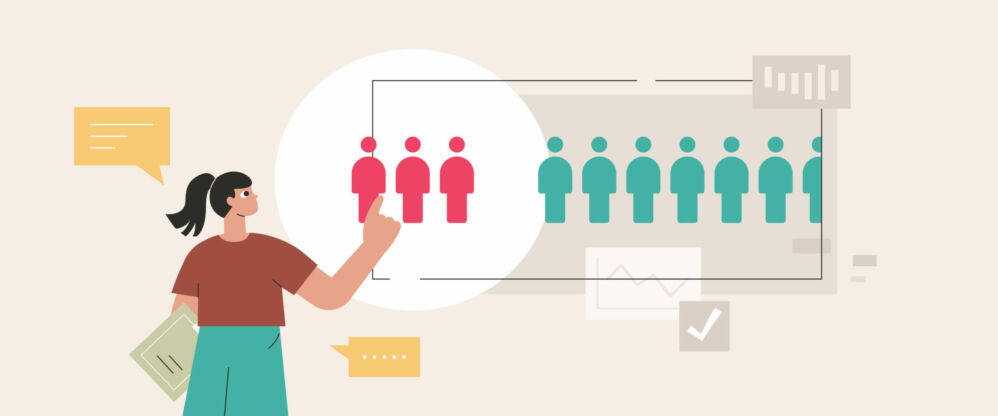

In customer relationship management, it is important for e-commerce businesses to attract new customers and retain existing ones. Predicting customer churn in e-commerce business is critical to the success of online retailers. By analyzing customer data, businesses can gain insights into customer behavior and develop strategies to retain customers, ultimately improving customer satisfaction and driving revenue growth.

## 1.2 Problem Statement

Knowing how to predict customer churn in an e-commerce business is critical to the success of online retailers. Therefore, the problem statement is: _How many customers are at risk of churning in this particular e-commerce company?_

Customer at risk to churn will be defined as the target in this prediction, with classification Yes or No. Since the comprehensive prediction is necessary, the analysis will be using Artifical Neural Network (ANN) with two models: **Sequential** and **Functional**.

The selected model is the model that has the highest **recall**. A high recall means that the model is able to correctly identify most of the true positives (**customers at risk of churning**) and has a low number of false negatives (false negatives are cases that should have been identified as positive but were missed by the model).



## 1.3 Objective

The objective of predicting customer churn in a company is to identify which customers are at risk of leaving or discontinuing their use of the company's products or services. By predicting customer churn, a company can take proactive measures to retain these customers, such as providing better customer service, offering discounts or incentives, or improving the quality of their products or services. Predicting customer churn can also help a company to allocate its resources more efficiently and prioritize its efforts to retain the most valuable customers. Ultimately, reducing customer churn can lead to increased revenue, improved customer loyalty, and better long-term profitability for the company.

---

# 2 - Importing Libraries

> This section contains the process of importing libraries and checking the version of the libraries.

## 2.1 Import Libraries

This section explains how to import the libraries that will be used in this notebook. The libraries used include `pandas`, `numpy`, `matplotlib`, `seaborn`, `plotly`, `scikit_learn` and `tensorflow`.

In [1]:
!pip install feature_engine
!pip install --upgrade tensorflow==2.9.0

# Importing Libraries
import numpy as np
import pandas as pd
import sklearn

import warnings
warnings.filterwarnings('ignore')

# Data visualization libraries
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
import plotly
import plotly.express as px

# model definition
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Input, Dense, Dropout, concatenate

# handling outliers
from feature_engine.outliers import Winsorizer

# Split Dataset, Standarize, and Hyperparameter Tuning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder

# feature selection
from sklearn.feature_selection import SelectKBest, f_classif

# create pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

# Evaluate Classification Models
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, confusion_matrix

# Save and Load Model
import pickle
import json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## 2.2 Libraries Version

This section shows the version of the libraries used in this notebook.

In [2]:
# library version
print('pandas version :',(pd.__version__))
print('numpy version :',(np.__version__))
print('matplotlib version :',(matplotlib.__version__))
print('seaborn version :',(sns.__version__))
print('plotly version :',(plotly.__version__))
print('scikit-learn version :',(sklearn.__version__))
print('tensorflow version :',(tf.__version__))


pandas version : 1.4.4
numpy version : 1.22.4
matplotlib version : 3.7.1
seaborn version : 0.12.2
plotly version : 5.13.1
scikit-learn version : 1.2.2
tensorflow version : 2.9.0


---

# 3 - Data Loading

> This section explains the data preparation process prior to further data exploration. The data preparation process carried out in this section includes the process of data loading, checking the size of the dataset, displaying information of the dataset, checking for missing values, checking for duplicated entries, and measuring of central tendency.

## 3.1 Data Loading

This section explains the process of data loading. Dataset used is churn dataset from an e-commerce company that wants to minimize the risk of a customer stopping using the product they offer.

In [3]:
# Data Loading
df= pd.read_csv('churn.csv')
# Displaying the top 10 rows of the dataset
df.head(10)

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,...,1184.490000,38604.69,10.0,627.48000,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,...,338.150000,7665.66,17.0,575.97000,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,235.140000,37671.69,5.0,767.93000,Yes,No,Yes,No Information Available,Too many ads,0
3,aeee343277211c2f,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,...,56.670000,15678.14,11.0,590.22000,No,Yes,No,Not Applicable,Too many ads,1
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,...,153.990000,8422.68,0.0,722.04000,Yes,No,No,Not Applicable,Poor Product Quality,0
5,96fbb6f63244b1f4,35,M,Town,Premium Membership,2016-08-16,No,Credit/Debit Card Offers,NaN,Wi-Fi,...,1397.318999,29664.01,28.0,782.49000,No,Yes,Yes,Unsolved,Poor Product Quality,0
6,a52bc51378ecb057,43,M,NaN,Gold Membership,2017-03-09,Yes,Gift Vouchers/Coupons,Smartphone,Mobile_Data,...,416.300000,13160.39,24.0,712.94000,Yes,No,No,Not Applicable,No reason specified,1
7,94f338d20bf0f2b2,15,M,City,No Membership,2016-09-11,No,Credit/Debit Card Offers,Smartphone,Wi-Fi,...,34.070000,9151.14,29.0,655.43000,Yes,No,No,Not Applicable,No reason specified,1
8,85c7996b17862e57,49,M,Town,Platinum Membership,2017-04-24,Yes,Without Offers,NaN,Fiber_Optic,...,650.120000,81628.48,11.0,0.00000,Yes,Yes,No,Not Applicable,Products always in Stock,0
9,8a1625846d7a198b,35,F,Town,Basic Membership,2016-12-01,Yes,Credit/Debit Card Offers,Desktop,Mobile_Data,...,106.230000,28232.59,16.0,984.93392,No,Yes,No,Not Applicable,Too many ads,1


In [4]:
# Displaying the bottom 10 rows of the dataset
df.tail(10)

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
37000,8a0fff47b7846031,25,F,Town,No Membership,2017-01-20,No,Gift Vouchers/Coupons,Smartphone,Wi-Fi,...,119.830000,13147.91,0.0,1019.382051,Yes,No,Yes,Solved in Follow-up,Poor Product Quality,1
37001,8832eec42dc0e347,38,M,Town,Silver Membership,2016-09-19,NaN,Credit/Debit Card Offers,Smartphone,Wi-Fi,...,34.790000,30820.83,23.0,631.830000,Yes,No,Yes,Unsolved,Poor Customer Service,1
37002,b9d9761f4d367c7a,49,F,City,No Membership,2017-12-12,NaN,Without Offers,Both,Wi-Fi,...,499.510000,17110.71,24.0,587.010000,Yes,No,No,Not Applicable,Poor Customer Service,1
37003,a38816e7522f5f7b,42,F,Town,Basic Membership,2017-07-05,Yes,Gift Vouchers/Coupons,Both,Wi-Fi,...,529.580000,42964.11,18.0,619.280000,Yes,Yes,No,Not Applicable,Poor Product Quality,1
37004,8968d0458164dda9,19,F,Town,Gold Membership,2016-07-17,Yes,Without Offers,Smartphone,Fiber_Optic,...,119.960000,14218.43,7.0,781.840000,Yes,No,No,Not Applicable,Too many ads,0
37005,924e9c06f0c73817,36,M,Town,Gold Membership,2015-03-05,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,199.330000,29455.29,9.0,846.520000,Yes,Yes,No,Not Applicable,User Friendly Website,0
37006,90e22286ac0acf04,27,F,City,Gold Membership,2017-01-15,Yes,Without Offers,Desktop,Wi-Fi,...,368.500000,27038.47,8.0,835.980000,No,Yes,No,Not Applicable,Reasonable Price,0
37007,9329a6297407334a,20,M,NaN,Gold Membership,2015-07-11,Yes,Without Offers,NaN,Mobile_Data,...,272.130000,39305.35,27.0,714.900000,Yes,Yes,Yes,Solved,Poor Customer Service,0
37008,a4403ddda8fcf9f3,38,F,City,Gold Membership,2016-05-25,Yes,Without Offers,Desktop,Wi-Fi,...,65.070000,46108.73,6.0,744.990000,No,Yes,No,Not Applicable,Poor Website,0
37009,93b5d0330d24fa15,36,M,Town,Gold Membership,2016-10-18,NaN,Without Offers,Both,Fiber_Optic,...,972.776679,26905.49,22.0,700.930000,Yes,No,Yes,No Information Available,Poor Customer Service,1


Following are the variables and definitions of each column in the dataset.

| Column | Description |
| --- | --- |
| `user_id` | ID of a customer |
| `age` | Age of a customer |
| `gender` | Gender of a customer |
| `region_category` | Region that a customer belongs to |
| `membership_category` | Category of the membership that a customer is using |
| `joining_date` | Date when a customer became a member |
| `joined_through referral` | Whether a customer joined using any referral code or ID |
| `preferred_offer types` | Type of offer that a customer prefers |
| `medium_of operation` | Medium of operation that a customer uses for transactions |
| `internet_option` | Type of internet service a customer uses |
| `last_visit_time` | The last time a customer visited the website |
| `days_since_last_login` | Number of days since a customer last logged into the website |
| `avg_time_spent` | Average time spent by a customer on the website |
| `avg_transaction_value` | Average transaction value of a customer |
| `avg_frequency_login_days` | Number of times a customer has logged in to the website |
| `points_in_wallet` | Points awarded to a customer on each transaction |
| `used_special_discount` | Whether a customer uses special discounts offered |
| `offer_application_preference` | Whether a customer prefers offers |
| `past_complaint` | Whether a customer has raised any complaints |
| `complaint_status` | Whether the complaints raised by a customer was resolved |
| `feedback` | Feedback provided by a customer |
| `churn_risk_score` | Churn score <br><br> `0` : Not churn <br> `1` : Churn |

## 3.2 Size of Dataset

This section explains how to check the size of the dataset.

In [5]:
# size of dataset
df.shape

(37010, 22)

## 3.3 Information

This section explains the information contained in the dataset, including the index, columns, data type, non-null values, and memory usage.

In [6]:
# showing information from the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37010 entries, 0 to 37009
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   user_id                       37010 non-null  object 
 1   age                           37010 non-null  int64  
 2   gender                        36951 non-null  object 
 3   region_category               31579 non-null  object 
 4   membership_category           37010 non-null  object 
 5   joining_date                  37010 non-null  object 
 6   joined_through_referral       31568 non-null  object 
 7   preferred_offer_types         36722 non-null  object 
 8   medium_of_operation           31615 non-null  object 
 9   internet_option               37010 non-null  object 
 10  last_visit_time               37010 non-null  object 
 11  days_since_last_login         37010 non-null  int64  
 12  avg_time_spent                37010 non-null  float64
 13  a

## 3.4 Missing Values

This section explains the process for checking missing values.

In [7]:
# check for missing value
df.isnull().sum()

user_id                            0
age                                0
gender                            59
region_category                 5431
membership_category                0
joining_date                       0
joined_through_referral         5442
preferred_offer_types            288
medium_of_operation             5395
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                   0
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

There are missing values in this dataset.

## 3.5 Checking for Duplicated Data

This section explains the process to check for duplicated data in the dataset.

In [8]:
# Check for duplicated entries
df.duplicated().value_counts()

False    36992
True        18
dtype: int64

There are duplicated data in this dataset.

## 3.6 Measure of Central Tendency

Following are the measure of central tendency of the dataset.

In [9]:
# measure of central tendency
df.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,churn_risk_score
count,37010.000000,37010.000000,37010.000000,37010.000000,37010.000000,37010.000000,37010.000000
mean,37.120697,-41.943502,279.201356,29272.430216,14.659540,623.590885,0.540881
std,15.866834,228.875324,330.017336,19445.963492,9.478756,270.218956,0.498333
min,10.000000,-999.000000,0.000000,800.460000,0.000000,0.000000,0.000000
25%,23.000000,8.000000,60.122500,14177.835000,7.000000,574.220000,0.000000
50%,37.000000,12.000000,161.770000,27554.485000,14.000000,680.400000,1.000000
75%,51.000000,16.000000,356.525000,40858.672500,22.000000,756.990000,1.000000
max,64.000000,26.000000,3235.578521,99914.050000,73.061995,2069.069761,1.000000


---

# 4 - Exploratory Data Analysis

> This section contains data exploration of the dataset. Data exploration carried out to find out the number of customers who are at risk of churning, the number of customers based on their membership category, the relationship between the average transaction value and customer at risk of churning, the relationship between the customer at risk of churning and points balance in their wallet, the relationship between the customer at risk of churning and their feedback and correlation matrix analysis to find out the correlation between features and customer at risk of churning.

## 4.1 Number of Customer at Risk of Churning

This section describes the data exploration process to find out the number of customers at risk of churning.

In [10]:
# churn 
df_eda = df.copy()
df_eda.churn_risk_score.replace({0:'Not Churn',1:'Churn'}, inplace=True)
churn = df_eda.churn_risk_score.value_counts().to_frame().reset_index()
churn

,index,churn_risk_score
0,Churn,20018
1,Not Churn,16992


In [11]:
# Plot PieChart with Plotly
fig = px.pie(churn,values='churn_risk_score', names='index',color_discrete_sequence=['red','blue'])
fig.update_layout(title_text = "Number of Customer at risk of Churning")
fig.show()

Based on the table and visualization above, the percentage of customer at risk of churning is **54.1%**. Further data exploration is needed to find out what factors cause these customers to be at risk of churning.

## 4.2 Number of Customers Based on Their Membership Categories

This section describes the data exploration process to find out the number of customers based on their membership categories. 

In [12]:
# membership category
membership_category = df_eda.groupby(['churn_risk_score','membership_category']).aggregate(Number_of_customer_per_membership_category=('membership_category','count')).reset_index()
membership_category

,churn_risk_score,membership_category,Number_of_customer_per_membership_category
0,Churn,Basic Membership,7476
1,Churn,Gold Membership,2514
2,Churn,No Membership,7467
3,Churn,Silver Membership,2561
4,Not Churn,Basic Membership,251
5,Not Churn,Gold Membership,4285
6,Not Churn,No Membership,226
7,Not Churn,Platinum Membership,4342
8,Not Churn,Premium Membership,4458
9,Not Churn,Silver Membership,3430


In [13]:
# plotting bar plot
fig = px.bar(membership_category, x="membership_category", y="Number_of_customer_per_membership_category",color='churn_risk_score',color_discrete_sequence=['red','blue'],
             orientation="v",hover_name="membership_category"        
                
             )
fig.update_layout(title_text = "Number of customers based on their membership category")
fig.show()

Based on the table and visualization above, customers **without membership** and customers with **basic membership** have the highest risk of churning. Based on my assumption, customers without membership and customers with basic membership may have a higher risk of churning for several reasons:
1. Lack of loyalty: Customers without membership or with basic membership may not feel a strong sense of loyalty to the company or brand, making it easier for them to switch to a competitor.
2. Limited benefits: Basic membership may offer limited benefits or perks compared to higher-tier memberships, making it less attractive to customers who may be seeking more value.
3. Price sensitivity: Customers without membership or with basic membership may be more price-sensitive and may be more likely to switch to a competitor if they find a better deal elsewhere.
4. Limited engagement: Customers without membership or with basic membership may have limited engagement with the company or brand, making it harder for the company to build a strong relationship with them and retain their loyalty.

## 4.3 Average Transaction Value

This section describes data exploration to find the relationship between the average transaction value and customer at risk of churning.

In [14]:
# average transaction value
avg_transaction_value = df_eda.groupby(['churn_risk_score']).aggregate(avg_transaction_value=('avg_transaction_value','mean')).reset_index()
avg_transaction_value

,churn_risk_score,avg_transaction_value
0,Churn,25368.47303
1,Not Churn,33871.61895


In [15]:
# plotting bar plot
fig = px.bar(avg_transaction_value, x="churn_risk_score", y="avg_transaction_value",color='churn_risk_score',color_discrete_sequence=['red','blue'],
             orientation="v"       
                
             )
fig.update_layout(title_text = "Average Transaction Value")
fig.show()

Based on the table and visualization above, customers who are at risk of churning have a **lower average transaction value** compared to customers who are not at risk of churning. Based on my assumption, customers who are at risk of churning may have a lower average transaction value for several reasons:

1. Reduced usage: Customers who are at risk of churning may be using the company's products or services less frequently or may have stopped using them altogether. This reduced usage can result in a lower average transaction value.

2. Price sensitivity: Customers who are at risk of churning may be more price-sensitive and may be more likely to switch to a competitor if they find a better deal elsewhere. This can result in customers opting for lower-priced products or services, which can lower the average transaction value.

3. Disengagement: Customers who are at risk of churning may be less engaged with the company or brand and may be less likely to make high-value purchases. This reduced engagement can result in a lower average transaction value.

## 4.4 Points in Wallet

This section describes data exploration to find the relationship between the customer at risk of churning and points balance in their wallet.

In [16]:
# points in wallet
points_in_wallet = df_eda.groupby(['churn_risk_score']).aggregate(points_in_wallet=('points_in_wallet','mean')).reset_index()
points_in_wallet

,churn_risk_score,points_in_wallet
0,Churn,573.729076
1,Not Churn,682.332274


In [17]:
# plotting bar plot
fig = px.bar(points_in_wallet, x="churn_risk_score", y="points_in_wallet",color='churn_risk_score',color_discrete_sequence=['red','blue'],
             orientation="v"       
                
             )
fig.update_layout(title_text = "Points in Wallet")
fig.show()

Based on the table and visualization above, customers who are at risk of churning have a **lower points balance in their wallet** compared to customers who are not at risk of churning. Based on my assumption, customers who are at risk of churning may have a lower points balance in their wallet for several reasons:

1. Reduced usage: Customers who are at risk of churning may be using the company's products or services less frequently or may have stopped using them altogether. This reduced usage can result in a lower accumulation of points in their wallet.

2. Disengagement: Customers who are at risk of churning may be less engaged with the company or brand and may not be actively participating in loyalty programs or earning points. This reduced engagement can result in a lower accumulation of points in their wallet.

3. Redemption behavior: Customers who are at risk of churning may be redeeming their points at a higher rate than they are earning them. This redemption behavior can result in a lower points balance in their wallet.  

## 4.5 Feedback

This section describes data exploration to find the relationship between the customer at risk of churning and their feedback.

In [18]:
# feedback
feedback = df_eda.groupby(['churn_risk_score','feedback']).aggregate(Number_of_customer=('feedback','count')).reset_index()
feedback

,churn_risk_score,feedback,Number_of_customer
0,Churn,No reason specified,3995
1,Churn,Poor Customer Service,3993
2,Churn,Poor Product Quality,4127
3,Churn,Poor Website,3964
4,Churn,Too many ads,3939
5,Not Churn,No reason specified,2300
6,Not Churn,Poor Customer Service,2262
7,Not Churn,Poor Product Quality,2226
8,Not Churn,Poor Website,2309
9,Not Churn,Products always in Stock,1382


In [19]:
# plotting bar plot
fig = px.bar(feedback, x="feedback", y="Number_of_customer",color='churn_risk_score',color_discrete_sequence=['red','blue'],
             orientation="v",hover_name="feedback"        
                
             )
fig.update_layout(title_text = "Number of Customers Based on Their Feedback")
fig.show()

Based on the table and visualization above, The most feedback that causes customers to be at risk of churning is **poor product quality**. Based on my assumption, poor product quality can cause customers to be at risk of churning for several reasons:

1. Reduced satisfaction: Poor product quality can lead to reduced customer satisfaction, which can result in customers being less likely to continue using the company's products or services.

2. Negative word-of-mouth: Customers who experience poor product quality may share their negative experiences with others, resulting in negative word-of-mouth for the company. This can lead to a decrease in new customer acquisition and can also increase the likelihood of existing customers churning.

3. Lack of trust: Poor product quality can lead to a lack of trust in the company and its ability to provide high-quality products or services. This lack of trust can cause customers to be less loyal and more likely to switch to a competitor.

4. Perceived value: Poor product quality can result in customers perceiving less value in the company's products or services, which can make them less likely to continue using them and more likely to switch to a competitor.

## 4.6 Correlation Matrix Analysis

This section explains about correlation matrix analysis to find out the correlation between features and target (`churn_risk_score`).

In [20]:
df_copy = df.copy()
# Get Numerical Columns and Categorical Columns

num_columns = df_copy.select_dtypes(include=np.number).columns.tolist()
cat_columns = df_copy.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numerical Columns :  ['age', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet', 'churn_risk_score']
Categorical Columns :  ['user_id', 'gender', 'region_category', 'membership_category', 'joining_date', 'joined_through_referral', 'preferred_offer_types', 'medium_of_operation', 'internet_option', 'last_visit_time', 'used_special_discount', 'offer_application_preference', 'past_complaint', 'complaint_status', 'feedback']


In [21]:
# Using LabelEncoder to convert categorical into numerical data
m_LabelEncoder = LabelEncoder()

for col in df_copy[cat_columns]:
    df_copy[col]=m_LabelEncoder.fit_transform(df_copy[col])
df_copy.head()

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,18050,29,0,3,2,825,1,2,3,2,...,1184.49,38604.69,10.0,627.48,1,1,1,0,3,1
1,25711,50,1,3,0,820,1,2,1,0,...,338.15,7665.66,17.0,575.97,1,0,1,0,1,1
2,22381,26,0,0,5,772,2,0,3,0,...,235.14,37671.69,5.0,767.93,1,0,1,0,7,0
3,27174,63,0,2,2,356,0,0,1,0,...,56.67,15678.14,11.0,590.22,0,1,0,1,7,1
4,1297,64,1,1,5,78,2,1,2,2,...,153.99,8422.68,0.0,722.04,1,0,0,1,2,0


<Axes: >

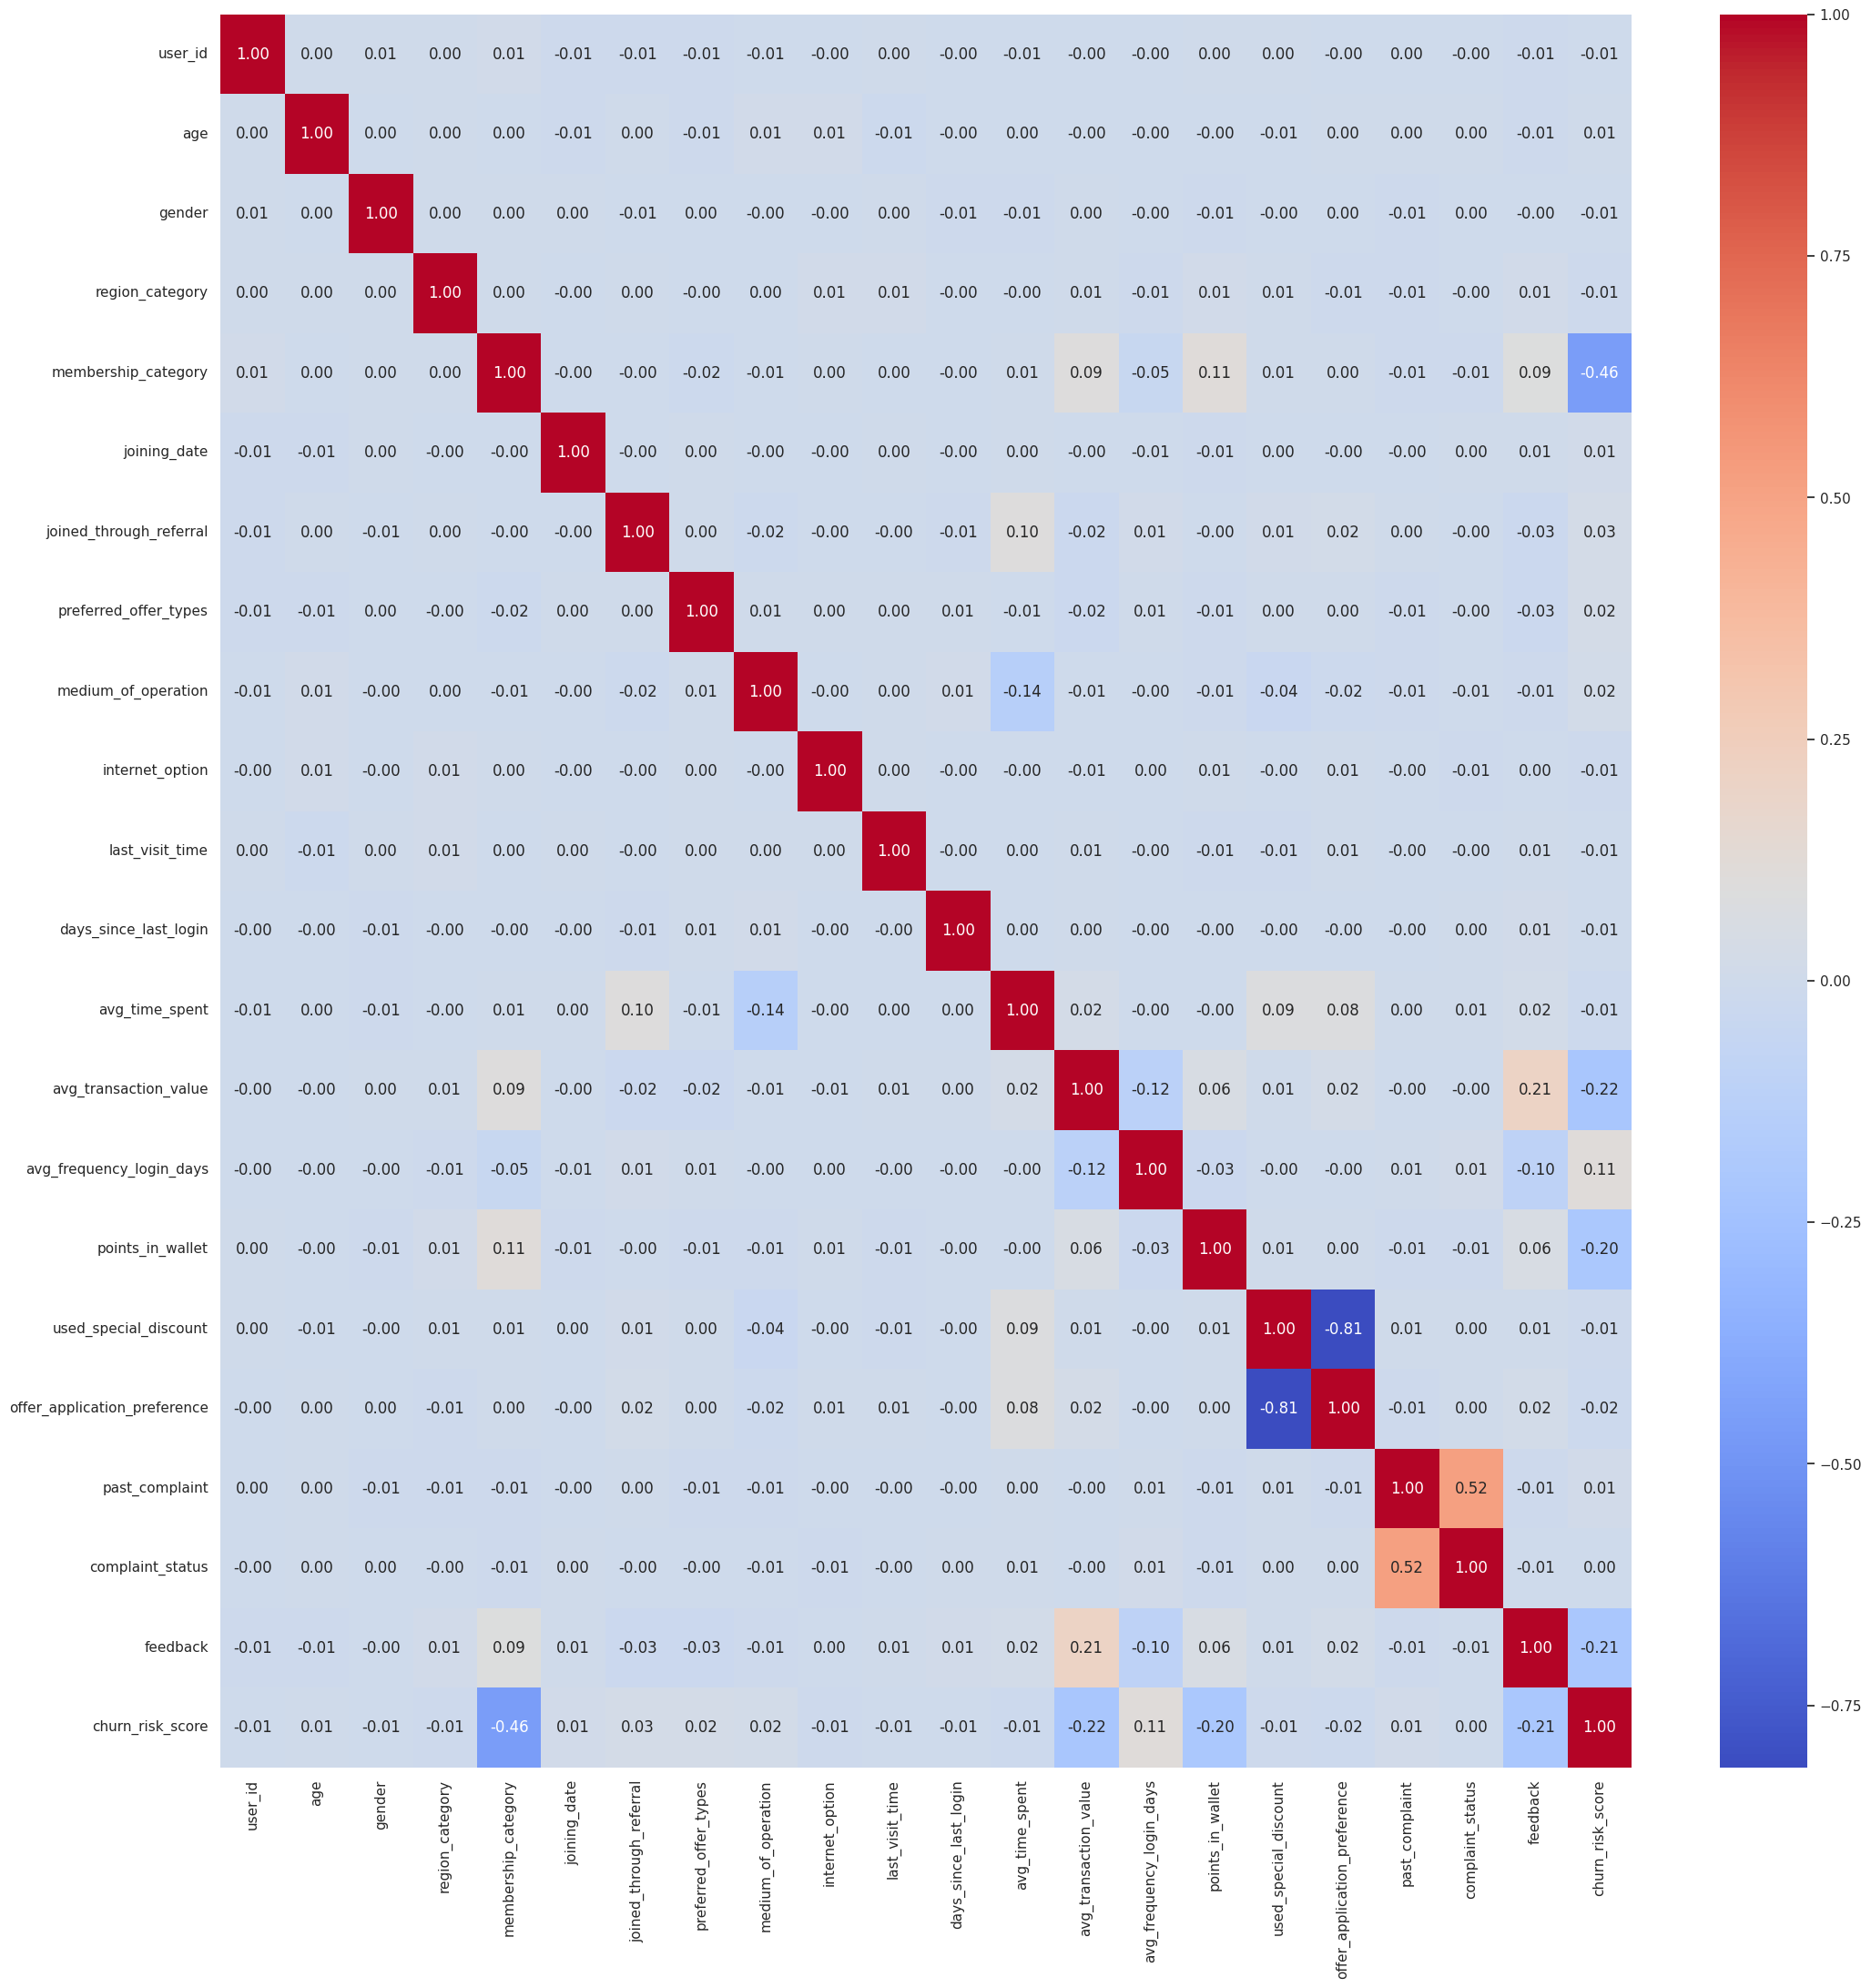

In [22]:
# Plotting Correlation Matrix of Categorical columns and default_payment
sns.set(font_scale=1)
plt.figure(figsize=(25,25))
sns.heatmap(df_copy.corr(),annot=True,cmap='coolwarm', fmt='.2f')

Features that have have a strong correlation with the target variable (`churn_risk_score`) are `membership_category`,`points_in_wallet`,`avg_transaction_value`,`feedback`,`avg_frequency_login_days`,`joined_through_referral`,`preferred_offer_types`,`medium_of_operation`,`region_category` and `	offer_application_preference`.

---

# 5 - Feature Engineering

> This section explains the process of preparing data for the model training process, such as creating data inference, separating data into train-tests, data cleaning, data transformation (normalization, encoding, etc.), and other processes needed.

## 5.1 Creating Data Inference

This section explains how to create a data inference. To create the data inference, we will set aside 10 data from the original dataset.

In [23]:
# Creating data inference
data = df.copy()
df_inf = data.sample(10, random_state=0).sort_index()
print('size of data inference (rows,columns) : ',df_inf.shape)
df_inf.reset_index(drop=True).head(10)

size of data inference (rows,columns) :  (10, 22)


,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,972706cb0db0068e,46,F,Town,Premium Membership,2015-03-27,No,Credit/Debit Card Offers,Smartphone,Mobile_Data,...,1447.387929,11839.58,29.0,727.91,Yes,No,No,Not Applicable,No reason specified,0
1,82d62cc806fb2816,25,M,Town,Premium Membership,2016-09-07,NaN,Without Offers,Smartphone,Wi-Fi,...,114.170000,46885.80,8.0,793.11,No,Yes,Yes,Unsolved,No reason specified,0
2,a596b4679c30ef3e,64,M,NaN,Basic Membership,2017-09-07,Yes,Credit/Debit Card Offers,Smartphone,Wi-Fi,...,204.430000,42224.69,26.0,510.37,Yes,No,Yes,Solved,Too many ads,1
3,8c4761dbf8df1816,52,F,City,Gold Membership,2017-12-31,Yes,NaN,Smartphone,Wi-Fi,...,179.330000,48836.04,20.0,705.00,Yes,No,Yes,Solved in Follow-up,No reason specified,0
4,8f2f492e0c25eb41,60,M,Town,Basic Membership,2015-07-08,Yes,Credit/Debit Card Offers,Smartphone,Wi-Fi,...,38.940000,14104.52,21.0,677.41,Yes,No,Yes,No Information Available,Poor Customer Service,0
5,9bba07c5c386c34c,57,F,City,Silver Membership,2016-06-22,No,Gift Vouchers/Coupons,NaN,Mobile_Data,...,0.000000,8150.90,20.0,793.32,No,Yes,No,Not Applicable,No reason specified,0
6,8a205a969e23299d,17,M,NaN,Gold Membership,2015-05-19,No,Gift Vouchers/Coupons,Desktop,Wi-Fi,...,199.940000,75765.63,0.0,820.17,Yes,No,Yes,Solved,Quality Customer Care,0
7,91607fb18aafbfee,15,M,City,No Membership,2017-11-15,Yes,Gift Vouchers/Coupons,Desktop,Fiber_Optic,...,67.550000,32777.77,23.0,533.44,Yes,No,No,Not Applicable,Poor Customer Service,1
8,847bddd58ff99d7e,32,M,Town,Basic Membership,2016-02-02,Yes,Without Offers,Smartphone,Mobile_Data,...,119.980000,1888.81,28.0,628.93,No,Yes,No,Not Applicable,Too many ads,1
9,8c92ce118df969a1,29,M,Village,Platinum Membership,2016-10-19,No,Credit/Debit Card Offers,NaN,Fiber_Optic,...,145.070000,28873.91,19.0,715.50,No,Yes,No,Not Applicable,Too many ads,0


In [24]:
# Saving data inference as .csv file
df_inf.to_csv('h8dsft_p2m1_Ahmad Luay Adnani_inference.csv')

In [25]:
# Removing data inference from dataset 
df_train_test  = data.drop(df_inf.index)
print('size of original dataset (rows,columns) :',data.shape)
print('size of dataset after data inference is removed (rows,columns) :',df_train_test .shape)
df_train_test .head()

size of original dataset (rows,columns) : (37010, 22)
size of dataset after data inference is removed (rows,columns) : (37000, 22)


,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,...,1184.49,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,...,338.15,7665.66,17.0,575.97,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,235.14,37671.69,5.0,767.93,Yes,No,Yes,No Information Available,Too many ads,0
3,aeee343277211c2f,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,...,56.67,15678.14,11.0,590.22,No,Yes,No,Not Applicable,Too many ads,1
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,...,153.99,8422.68,0.0,722.04,Yes,No,No,Not Applicable,Poor Product Quality,0


## 5.2 Splitting Between X and y

This section explains how to separate dataset into training set, testing set and validation set.

In [26]:
# Defining X and y
X = df_train_test.drop(['churn_risk_score'],axis=1)
y = pd.DataFrame(df_train_test['churn_risk_score'])

In [27]:
# Split between Train-Set, Val-Set, and Test-Set

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15, random_state=0)

print('Train Size : ', X_train.shape)
print('Val Size : ', X_val.shape)
print('Test Size : ', X_test.shape)

Train Size :  (26732, 21)
Val Size :  (4718, 21)
Test Size :  (5550, 21)


## 5.3 Check the distribution of data

This section explains how to check the distribution of the data. The histogram and boxplot visualizations below show the distribution of numerical data in the dataset.

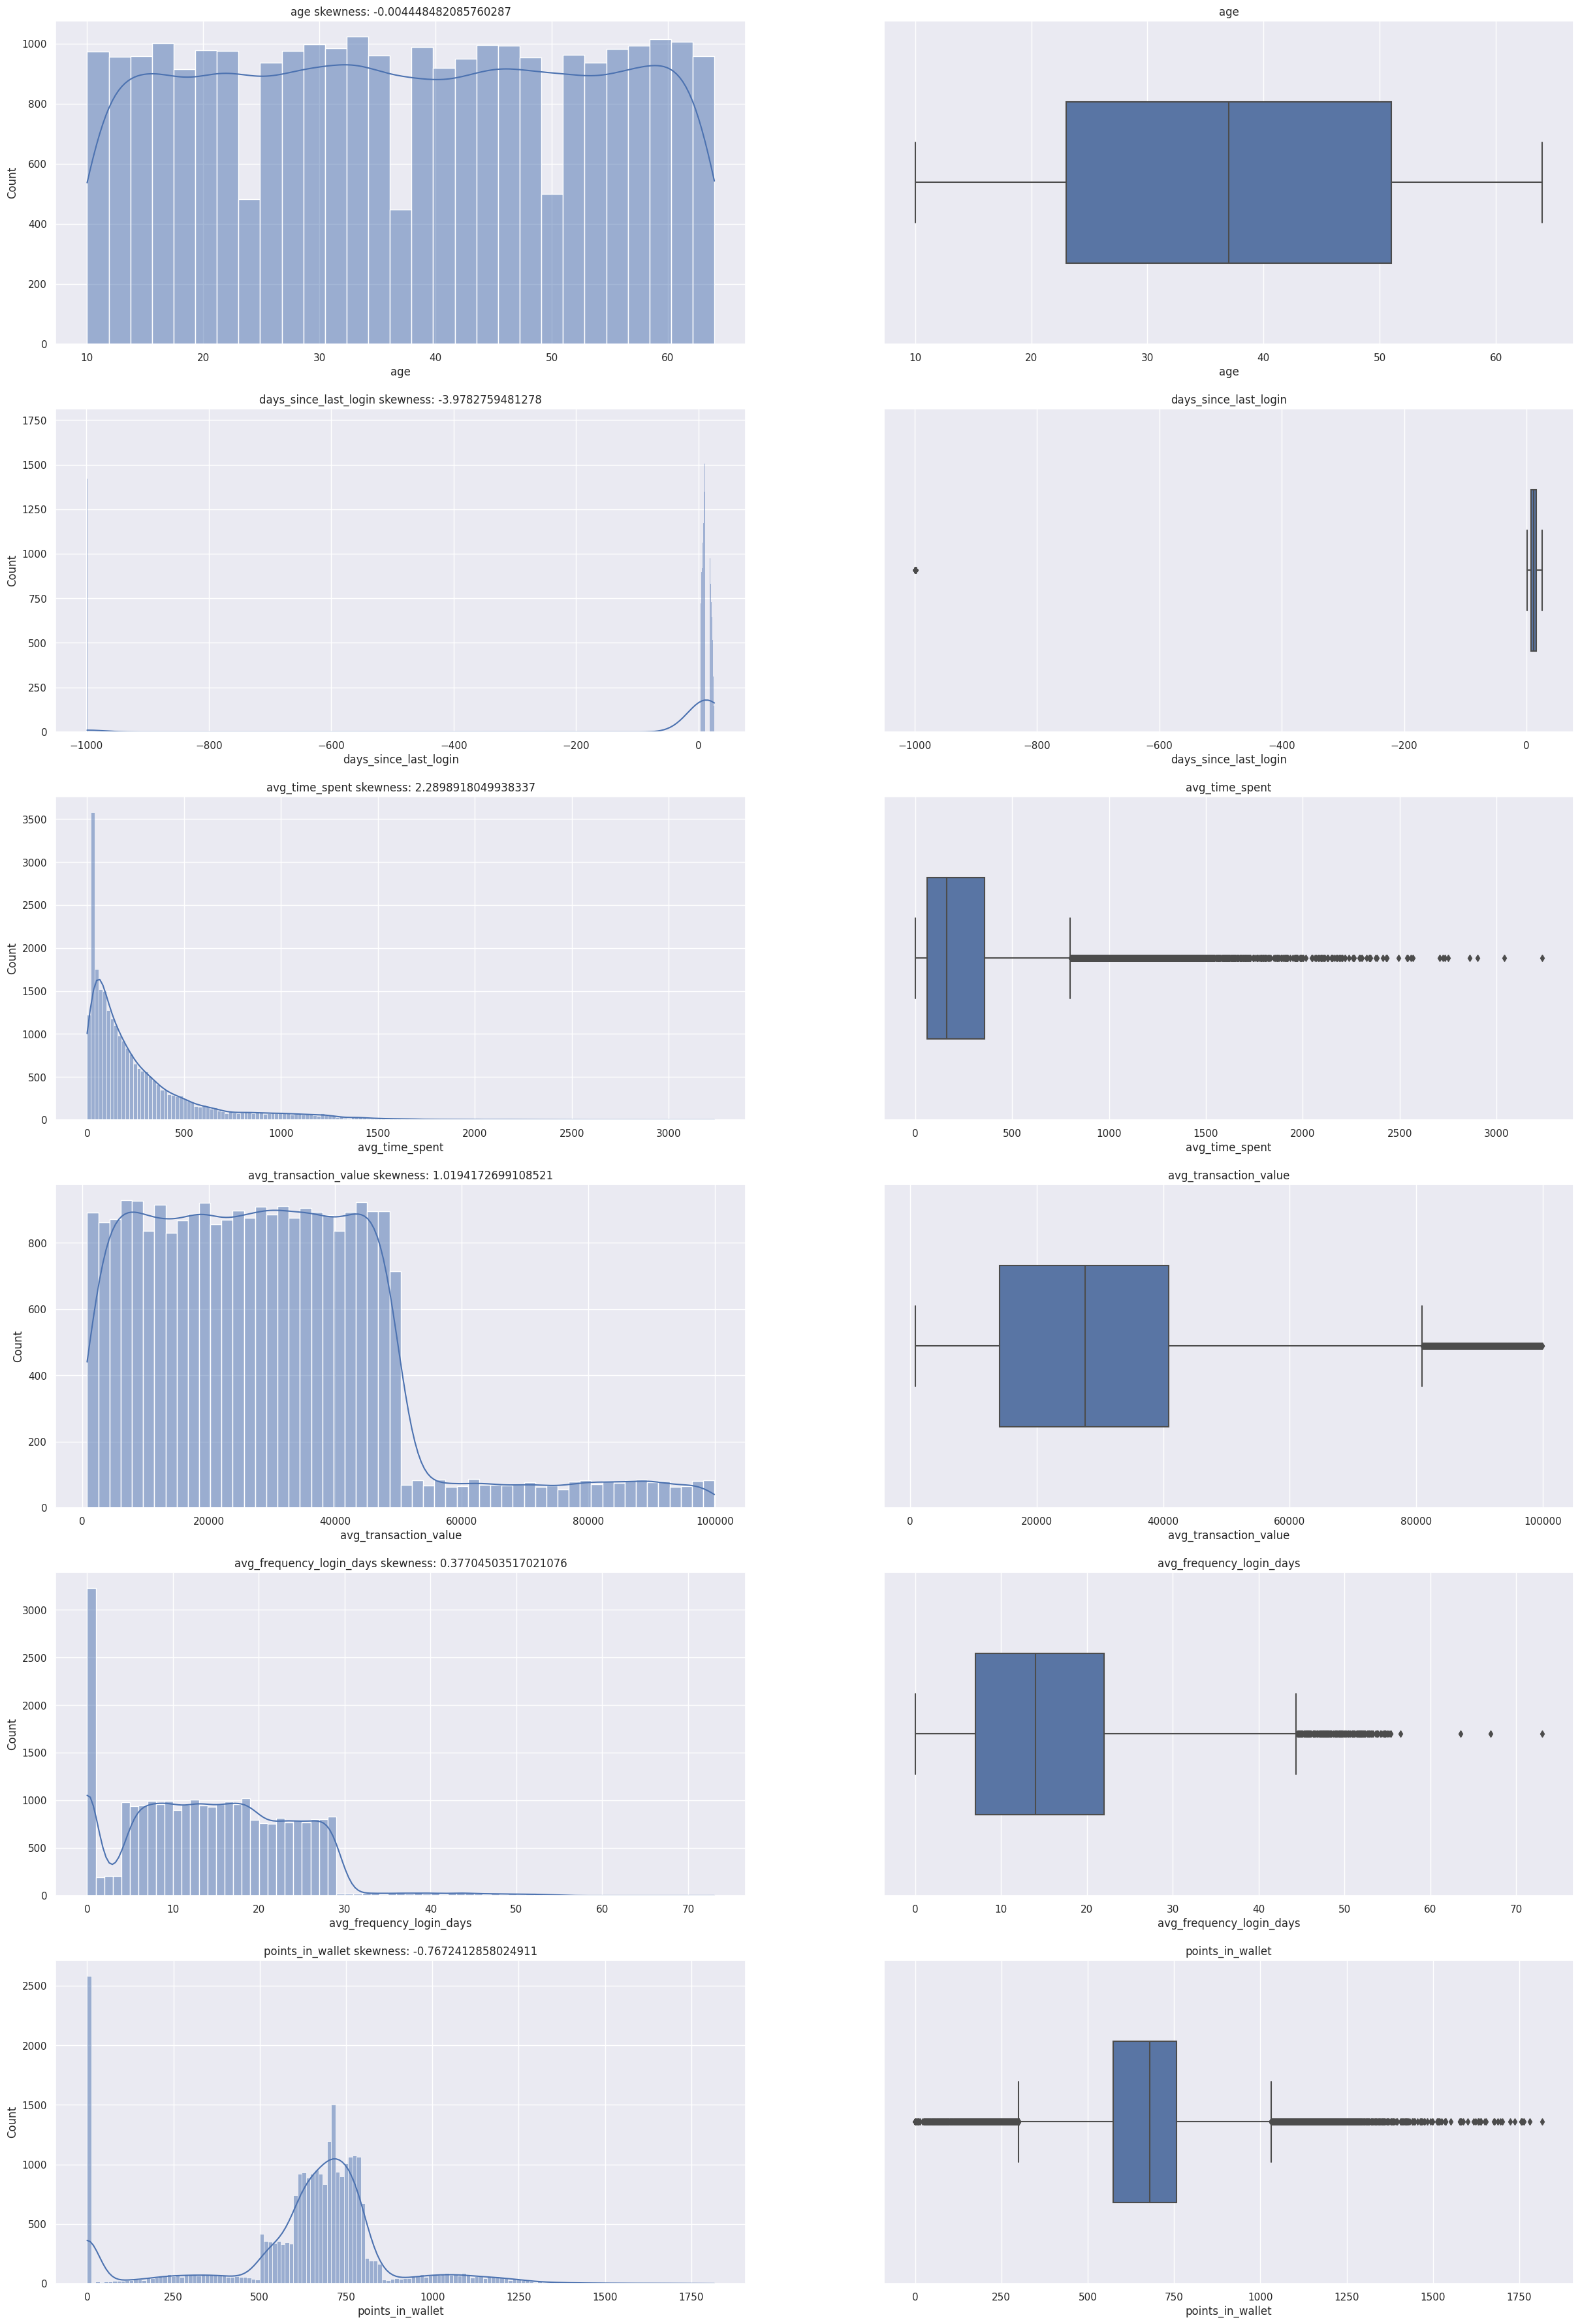

In [28]:
# plot histogram and boxplot
# numerical columns
num_columns = ['age','days_since_last_login','avg_time_spent','avg_transaction_value','avg_frequency_login_days','points_in_wallet']
X_train_num = X_train[num_columns]
n=len(X_train_num.columns)
sns.set(font_scale=1)
fig, ax = plt.subplots(n,2,figsize=(30,45))
for i in range(n):
    col = X_train_num.columns[i]
    sns.histplot(ax=ax[i,0],data=X_train_num[col],kde=True)
    ax[i,0].set_title(f'{col} skewness: {X_train_num[col].skew()}')
    sns.boxplot(ax=ax[i,1],data=X_train_num,x=X_train_num[col],width=0.50)
    ax[i,1].set_title(col)

In [29]:
# Create Function to calculate skewness
def skewness(df,col):
  skewness = df[col].skew()
  if skewness>=-0.5 and skewness<=0.5:
    print(f'Distribution of {col} : Normal Distribution')
  elif skewness<=-0.5:
    print(f'Distribution of {col} : Left Skewed')
  else:
    print(f'Distribution of {col} : Right Skewed')

In [30]:
# Distribution
n=len(X_train_num.columns)

for i in range(n):
    col = X_train_num.columns[i]
    skewness(X_train_num,col)

Distribution of age : Normal Distribution
Distribution of days_since_last_login : Left Skewed
Distribution of avg_time_spent : Right Skewed
Distribution of avg_transaction_value : Right Skewed
Distribution of avg_frequency_login_days : Normal Distribution
Distribution of points_in_wallet : Left Skewed


Data that is normally distributed will be feature scaled using the `StandardScaler`, while those that are skewed will be feature scaled using the `MinMaxScaler`.

## 5.4 Handling Missing Values

This section contains the process of handling missing values.

In [31]:
# Check Missing Values in X_train

X_train.isnull().sum()

user_id                            0
age                                0
gender                            38
region_category                 3952
membership_category                0
joining_date                       0
joined_through_referral         3948
preferred_offer_types            190
medium_of_operation             3913
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                   0
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
dtype: int64

In [32]:
# Check Missing Values in X_val

X_val.isnull().sum()

user_id                           0
age                               0
gender                           10
region_category                 661
membership_category               0
joining_date                      0
joined_through_referral         684
preferred_offer_types            53
medium_of_operation             695
internet_option                   0
last_visit_time                   0
days_since_last_login             0
avg_time_spent                    0
avg_transaction_value             0
avg_frequency_login_days          0
points_in_wallet                  0
used_special_discount             0
offer_application_preference      0
past_complaint                    0
complaint_status                  0
feedback                          0
dtype: int64

In [33]:
# Check Missing Values in X_test

X_test.isnull().sum()

user_id                           0
age                               0
gender                           11
region_category                 816
membership_category               0
joining_date                      0
joined_through_referral         809
preferred_offer_types            44
medium_of_operation             785
internet_option                   0
last_visit_time                   0
days_since_last_login             0
avg_time_spent                    0
avg_transaction_value             0
avg_frequency_login_days          0
points_in_wallet                  0
used_special_discount             0
offer_application_preference      0
past_complaint                    0
complaint_status                  0
feedback                          0
dtype: int64

Because there are too many missing values and all the missing values are in the **categorical column**, the handling of missing values is using `fillna()`.

In [34]:
# check categorical columns
print('categorical columns: ',cat_columns)

categorical columns:  ['user_id', 'gender', 'region_category', 'membership_category', 'joining_date', 'joined_through_referral', 'preferred_offer_types', 'medium_of_operation', 'internet_option', 'last_visit_time', 'used_special_discount', 'offer_application_preference', 'past_complaint', 'complaint_status', 'feedback']


In [35]:
# Fill missing values in categorical data with 'Unknown'
X_train = X_train.fillna({'gender':'Unknown','region_category':'Unknown','joined_through_referral':'Unknown','preferred_offer_types':'Unknown','medium_of_operation':'Unknown'})
X_val = X_val.fillna({'gender':'Unknown','region_category':'Unknown','joined_through_referral':'Unknown','preferred_offer_types':'Unknown','medium_of_operation':'Unknown'})
X_test = X_test.fillna({'gender':'Unknown','region_category':'Unknown','joined_through_referral':'Unknown','preferred_offer_types':'Unknown','medium_of_operation':'Unknown'})
X_train.isnull().sum()

user_id                         0
age                             0
gender                          0
region_category                 0
membership_category             0
joining_date                    0
joined_through_referral         0
preferred_offer_types           0
medium_of_operation             0
internet_option                 0
last_visit_time                 0
days_since_last_login           0
avg_time_spent                  0
avg_transaction_value           0
avg_frequency_login_days        0
points_in_wallet                0
used_special_discount           0
offer_application_preference    0
past_complaint                  0
complaint_status                0
feedback                        0
dtype: int64

## 5.5 Handling Outliers

This section explains how to handle outliers in the train set.

In [36]:
# Create Function
def outlier_analysis(df,col):
  skewness = df[col].skew()
  if skewness>=-0.5 and skewness<=0.5:
    upper = df[col].mean() + 3*X_train[col].std()
    lower = df[col].mean() - 3*X_train[col].std()
  else:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    upper = Q3 + (1.5 * IQR)
    lower = Q1 - (1.5 * IQR)
    
  no_outliers = df[(df[col]>=lower) &  (df[col]<=upper)]
  outliers = df[(df[col]>upper ) | (df[col]<lower) ]

  return outliers,no_outliers, upper, lower

In [37]:
# percentage of outlier in train set
num = X_train_num
n=len(num.columns)

for i in range(n):
    col = num.columns[i]
    out,no_out, up, low = outlier_analysis (X_train,col)
    print(f'column name: {col}')
    print('count of outlier: ', len(out))
    print('percentage of outlier: ', (len(out)/len(X_train))*100, '%') 
    print('-'*20)

column name: age
count of outlier:  0
percentage of outlier:  0.0 %
--------------------
column name: days_since_last_login
count of outlier:  1422
percentage of outlier:  5.319467305102499 %
--------------------
column name: avg_time_spent
count of outlier:  2295
percentage of outlier:  8.585216220260362 %
--------------------
column name: avg_transaction_value
count of outlier:  821
percentage of outlier:  3.071225497531049 %
--------------------
column name: avg_frequency_login_days
count of outlier:  215
percentage of outlier:  0.80427951518779 %
--------------------
column name: points_in_wallet
count of outlier:  4842
percentage of outlier:  18.113122849019902 %
--------------------


Because there are too many outliers, outlier handling is done using the Capping Method with `Winsorizer` library.

In [38]:
# capping outlier if exist and in large proportion
wins = Winsorizer(capping_method='iqr', tail='both', fold=1.5)
wins.fit(X_train)
X_train = wins.transform(X_train)

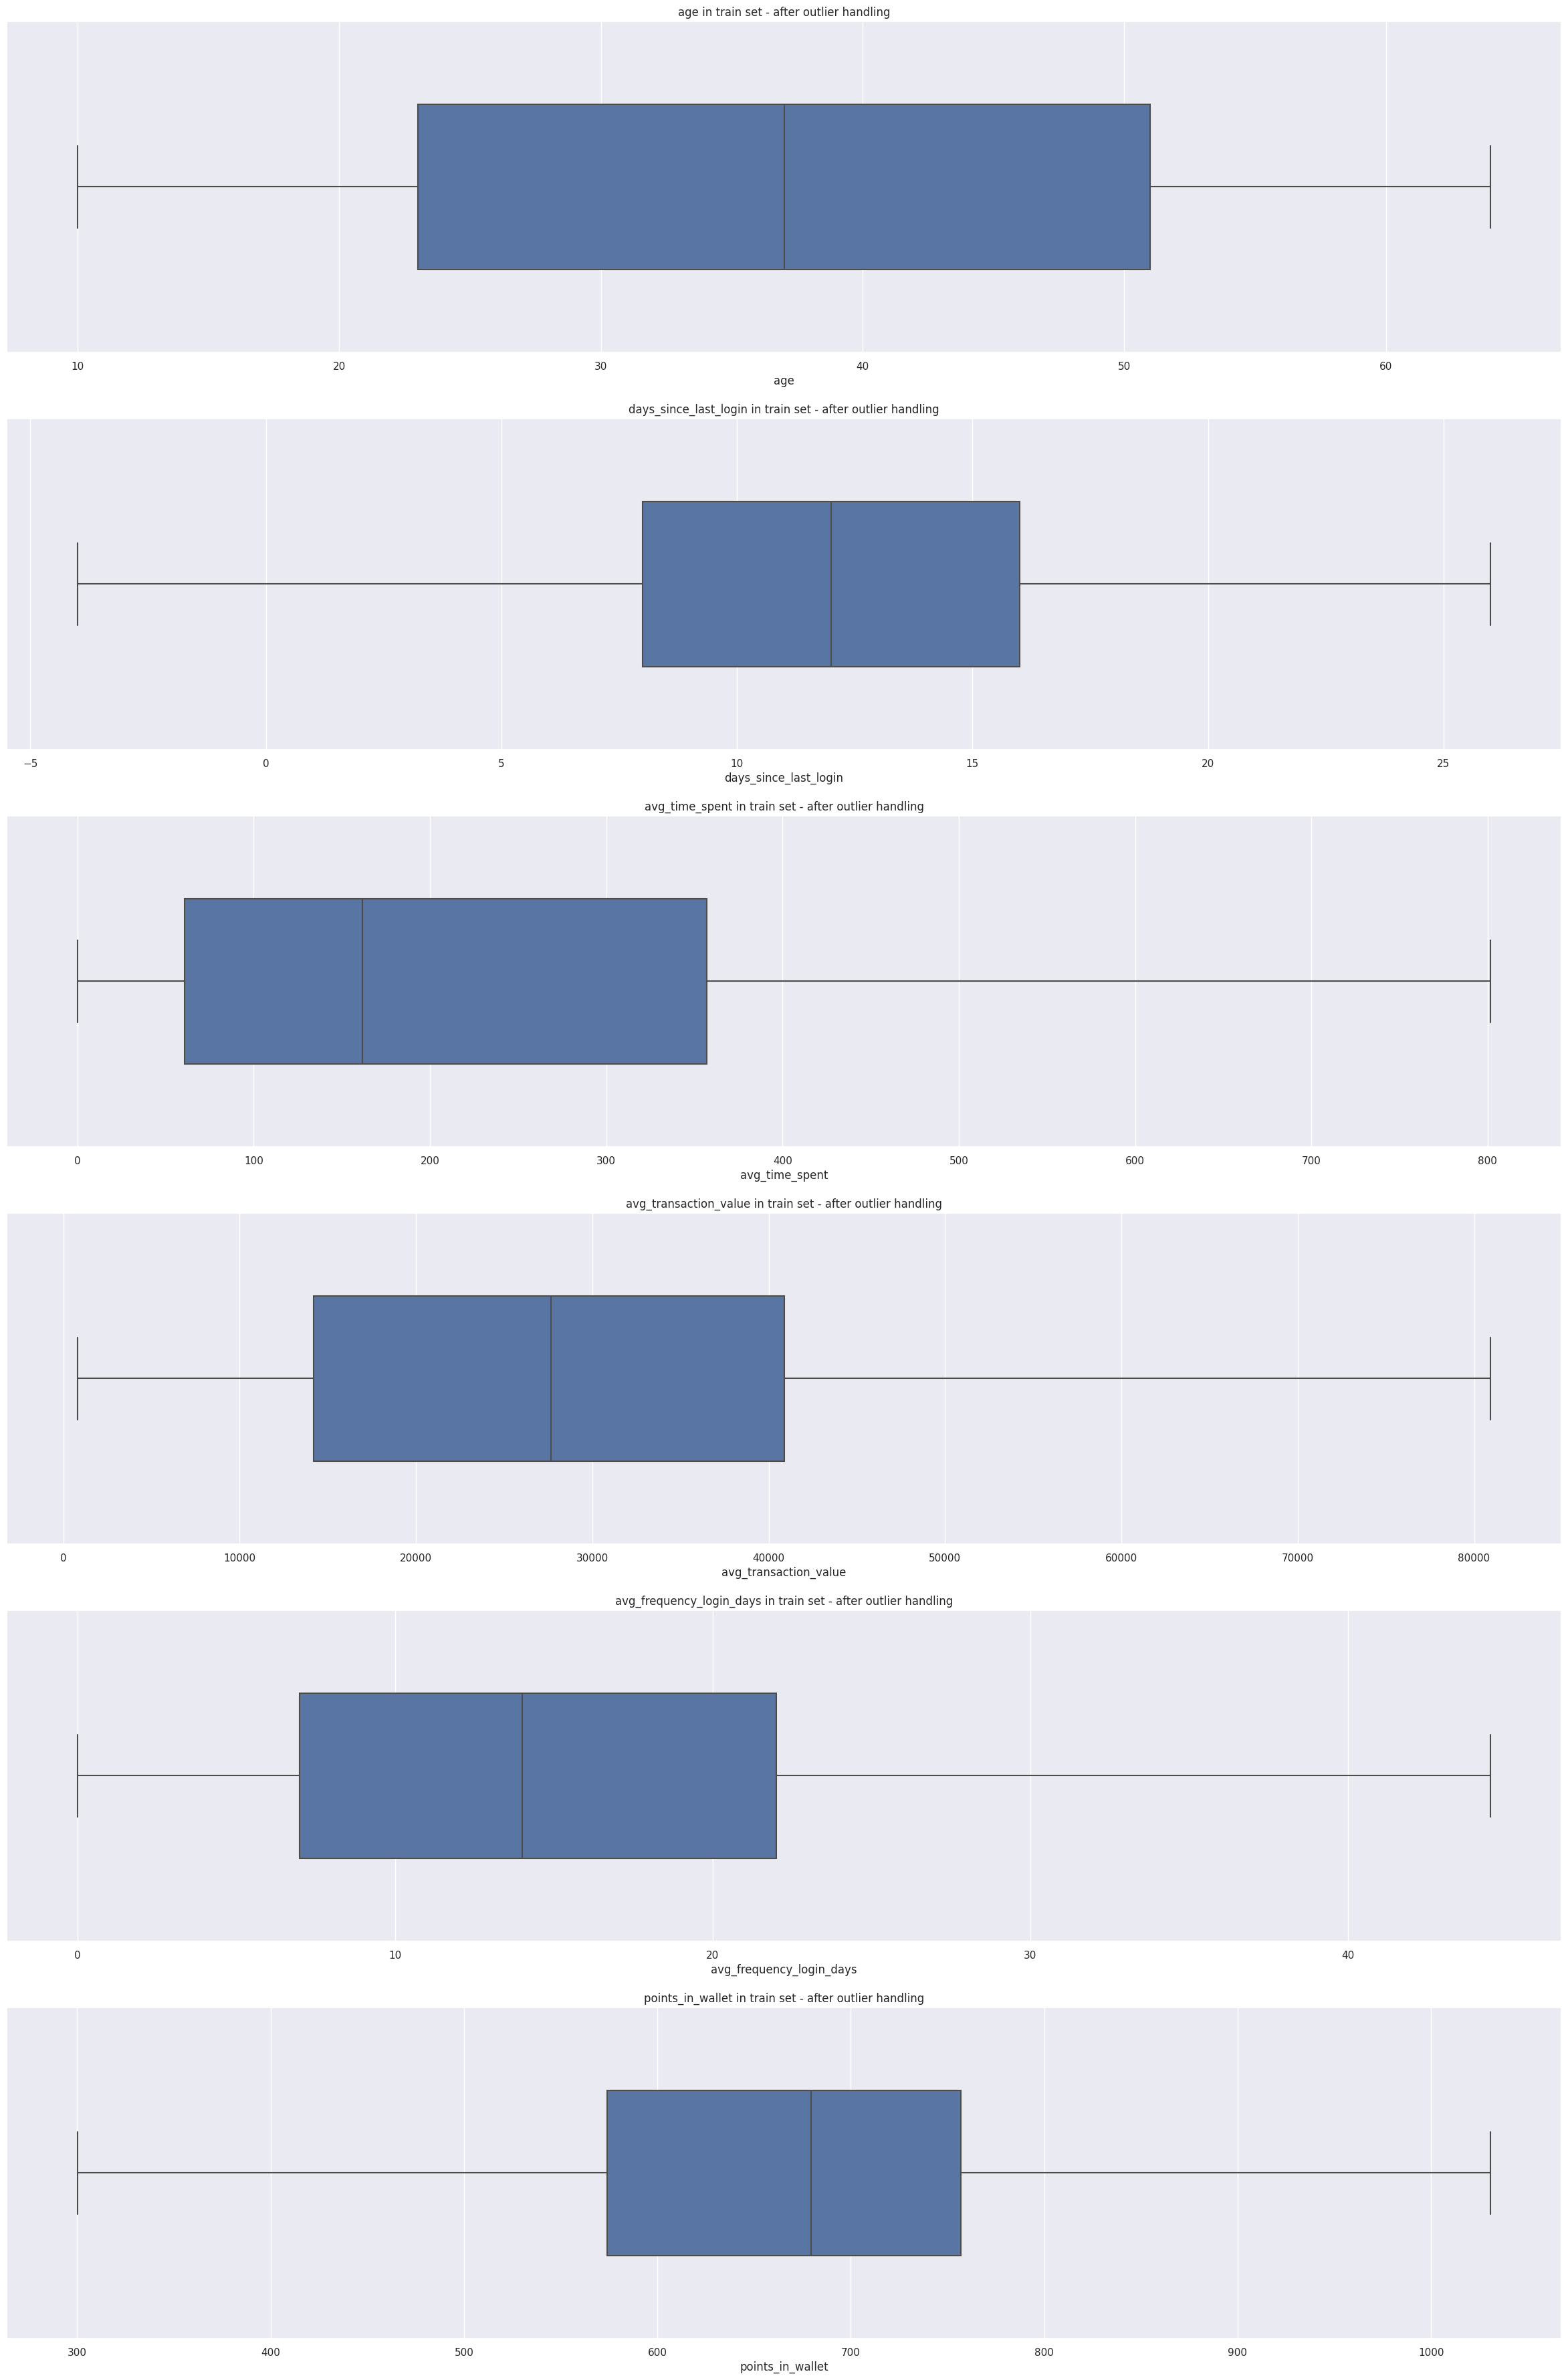

In [39]:
# Boxplot visualization
num = X_train_num
n=len(num.columns)
sns.set(font_scale=1)
fig, ax = plt.subplots(n,1,figsize=(30,45))
for i in range(n):
    col = num.columns[i]
    sns.boxplot(ax=ax[i],data=X_train,x=X_train[col],width=0.50)
    ax[i].set_title(f'{col} in train set - after outlier handling')

## 5.6 Feature Selection

This section explains the process of creating a model with feature selection. Feature selection will use the `feature_selection` library to search for top 10 features with a **p-value < 0.05**, which means that the feature has a strong correlation with the target.

In [40]:
# Using LabelEncoder to convert categorical into numerical data
X_train_features = X_train.copy()
m_LabelEncoder = LabelEncoder()

for col in X_train_features[cat_columns]:
    X_train_features[col]=m_LabelEncoder.fit_transform(X_train_features[col])

In [41]:
# Feature Selection (select 10 best features)
selector = SelectKBest(score_func=f_classif, k=10)
selector = selector.fit(X_train_features, y_train)

df_scores = pd.DataFrame({'Feature': X_train_features.columns, 
                          'Score': selector.scores_,
                          'p-value': (selector.pvalues_).round(4)})

df_scores = df_scores.sort_values(by=['Score'], ascending=False)
df_scores

,Feature,Score,p-value
4,membership_category,7073.049813,0.0000
15,points_in_wallet,1953.523945,0.0000
13,avg_transaction_value,1243.849366,0.0000
20,feedback,1139.965575,0.0000
14,avg_frequency_login_days,312.961884,0.0000
6,joined_through_referral,23.048445,0.0000
7,preferred_offer_types,20.683677,0.0000
8,medium_of_operation,12.423173,0.0004
3,region_category,11.950673,0.0005
17,offer_application_preference,9.909852,0.0016


Features that have p-value **less than 0.05** are `membership_category`, `points_in_wallet`,`avg_transaction_value`,`feedback`,`avg_frequency_login_days`,`joined_through_referral`,`preferred_offer_types`,`medium_of_operation`,`region_category` and `	offer_application_preference`. This means that they have a strong correlation with the target variable (`churn_risk_score`).

In [42]:
# Drop Unnecessary Features
Drop_Columns = ['days_since_last_login','used_special_discount','joining_date','gender','age','user_id','internet_option','last_visit_time','complaint_status']
X_train_final = X_train.drop(Drop_Columns,axis=1).sort_index()
X_val_final = X_val.drop(Drop_Columns,axis=1).sort_index()
X_test_final = X_test.drop(Drop_Columns,axis=1).sort_index()

X_train_final

,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,offer_application_preference,past_complaint,feedback
2,City,Silver Membership,Unknown,Credit/Debit Card Offers,Unknown,235.1400,37671.6900,5.0,767.93000,No,Yes,Too many ads
4,Town,Silver Membership,Unknown,Gift Vouchers/Coupons,Smartphone,153.9900,8422.6800,0.0,722.04000,No,No,Poor Product Quality
5,Town,Premium Membership,No,Credit/Debit Card Offers,Unknown,801.6675,29664.0100,28.0,782.49000,Yes,Yes,Poor Product Quality
7,City,No Membership,No,Credit/Debit Card Offers,Smartphone,34.0700,9151.1400,29.0,655.43000,No,No,No reason specified
8,Town,Platinum Membership,Yes,Without Offers,Unknown,650.1200,80940.6325,11.0,300.11875,Yes,No,Products always in Stock
...,...,...,...,...,...,...,...,...,...,...,...,...
37004,Town,Gold Membership,Yes,Without Offers,Smartphone,119.9600,14218.4300,7.0,781.84000,No,No,Too many ads
37005,Town,Gold Membership,Unknown,Credit/Debit Card Offers,Unknown,199.3300,29455.2900,9.0,846.52000,Yes,No,User Friendly Website
37006,City,Gold Membership,Yes,Without Offers,Desktop,368.5000,27038.4700,8.0,835.98000,Yes,No,Reasonable Price
37007,Unknown,Gold Membership,Yes,Without Offers,Unknown,272.1300,39305.3500,27.0,714.90000,Yes,Yes,Poor Customer Service


## 5.7 Encoding: OrdinalEncoder (for target)

This section explains the process of encoding with `OrdinalEncoder`. `OrdinalEncoder` is used for categorical columns where data needs to be sorted.

In [43]:
# Using OrdinalEncoder to encode target train set
t_OrdinalEncoder = OrdinalEncoder()

default_encode = y_train.copy()
t_OrdinalEncoder.fit(default_encode[['churn_risk_score']])
default_encode[['churn_risk_score']] = t_OrdinalEncoder.transform(default_encode[['churn_risk_score']])
default_encode = default_encode['churn_risk_score']

y_train_final = pd.DataFrame(default_encode).sort_index()
y_train_final

,churn_risk_score
2,0.0
4,0.0
5,0.0
7,1.0
8,0.0
...,...
37004,0.0
37005,0.0
37006,0.0
37007,0.0


In [44]:
# Using OrdinalEncoder to encode target val set
default_encode = y_val.copy()
default_encode[['churn_risk_score']] = t_OrdinalEncoder.transform(default_encode[['churn_risk_score']])
default_encode = default_encode['churn_risk_score']

y_val_final = pd.DataFrame(default_encode).sort_index()
y_val_final

,churn_risk_score
0,1.0
1,1.0
3,1.0
13,1.0
23,1.0
...,...
36964,1.0
36969,0.0
36982,1.0
36986,1.0


In [45]:
# Using OrdinalEncoder to encode target test set
default_encode = y_test.copy()
default_encode[['churn_risk_score']] = t_OrdinalEncoder.transform(default_encode[['churn_risk_score']])
default_encode = default_encode['churn_risk_score']

y_test_final = pd.DataFrame(default_encode).sort_index()
y_test_final

,churn_risk_score
6,1.0
17,0.0
18,0.0
22,1.0
48,0.0
...,...
36995,0.0
36998,0.0
37001,1.0
37003,1.0


## 5.8 Pipeline

This section contains the creation of a pipeline, the pipeline that will be used are the Scikit-Learn pipeline and the Tensorflow pipeline.

### Pipeline Scikit-Learn

Scikit-Learn pipeline is for scaling and encoding variables. The scaling will be using `StandardScaler` for normally distributed data and `MinMaxScaler` for skewed data. Encoding will be using `OneHotEncoder` for categorical data.

In [46]:
# Get Numerical Columns and Categorical Columns

num_columns = X_train_final.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train_final.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numerical Columns :  ['avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet']
Categorical Columns :  ['region_category', 'membership_category', 'joined_through_referral', 'preferred_offer_types', 'medium_of_operation', 'offer_application_preference', 'past_complaint', 'feedback']


In [47]:
# Normal and Skewed Numerical Columns
numn_columns = ['avg_transaction_value','points_in_wallet']
nums_columns = ['avg_frequency_login_days']

In [48]:
# Create A Pipeline

numn_pipeline = make_pipeline(StandardScaler())
nums_pipeline = make_pipeline(MinMaxScaler())
cat_pipeline = make_pipeline(OneHotEncoder(sparse=False))

final_pipeline = ColumnTransformer([
    ('pipe_numn', numn_pipeline, numn_columns),
    ('pipe_nums', nums_pipeline, nums_columns),
    ('pipe_cat', cat_pipeline, cat_columns)
])

In [49]:
# Fit and Transform

X_train_final = final_pipeline.fit_transform(X_train_final)
X_val_final = final_pipeline.transform(X_val_final)
X_test_final = final_pipeline.transform(X_test_final)

In [50]:
X_train_final.shape

(26732, 37)

In [51]:
# Recheck
X_train_final

array([[ 0.46404221,  0.63836032,  0.11235955, ...,  0.        ,
         1.        ,  0.        ],
       [-1.10601622,  0.39170505,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.03419773,  0.71661921,  0.62921348, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.1067387 ,  1.0041239 ,  0.17977528, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.55173549,  0.35332809,  0.60674157, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.91693432,  0.51505956,  0.13483146, ...,  0.        ,
         0.        ,  0.        ]])

### Pipeline Tensorflow

After creating pipelines for scaling and encoding, another pipeline will be applied which is actually different from the scaling/encoding pipeline. It will be called as pipeline tensorflow, as we need to bundle the scaled and encoded pipelines so it can be proceeded in the model.

In this pipeline, following configuration is applied :
- Number of Batch is 1024
- Number of shuffle is equal to the number of column in train set
- Repeat for 2 times.

These numbers are randomly picked as trial-and-error


In [52]:
# Bundle preprocessing for numerical and categorical data to tensorflow before being input to the model
train_pipe = tf.data.Dataset.from_tensor_slices((X_train_final,y_train_final)).batch(1024).shuffle(len(X_train_final)).repeat(2).prefetch(tf.data.AUTOTUNE)
test_pipe = tf.data.Dataset.from_tensor_slices((X_test_final,y_test_final)).batch(1024)
val_pipe = tf.data.Dataset.from_tensor_slices((X_val_final,y_val_final)).batch(1024)

---

# 6 - Model Definition

> This section contains cells to define the model. Models that will be used are Neural Networks with sequential and functional model. Inspired by how human brains work, these computational systems learn a relationship between complex and often non-linear inputs and outputs. In Neural Networks, it is important to define which one is input layer, hidden layers, and output layer. Moreover, Neural Networks with many layers are referred to as **deep learning systems**.

## 6.1 Sequential

In sequential neural networks, we create the model layer-by-layer. Sharing of layers or branching of layers and multiple inputs or outputs are not allowed. So in this model, we can see from the flow chart that sequential model is basically a series model.

Hyperparameters in this model :  
1. - Number of neuron in input layer is equal to the number of column in train set
2. - There are 4 hidden layers in this model, hidden layer 1 has **64** neurons, hidden layer 2 has **32** neurons, hidden layer 3 has **16** neurons and hidden layer 4 has **8** neurons.
  - Activation Function: **ReLU** for every hidden layer
  - Weight Initialization : **HeNormal** for hidden layer 1
  - Kernel Regularization : **l1** for hidden layer 1
3. - Number of neuron in output layer is 1 (Binary Classification)
  - Activation Function: **sigmoid** (Binary Classification)
4. - For Compile, 
    - loss = **binary_crossentropy** for binary (0 or 1) classification
    - Optimizer = **SGD** have good Convergence Quality
    - metrics = `accuracy`,`recall`, and `precision`



In [121]:
# Sequential
# Clear Session

seed = 50
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

# Create Sequential API
model_seq = tf.keras.models.Sequential()

# Hidden Layer 1
model_seq.add(tf.keras.layers.Dense(64, activation='relu',input_shape=(X_train_final.shape[1],),kernel_initializer='HeNormal',kernel_regularizer='l1')) 

# Hidden Layer 2
model_seq.add(tf.keras.layers.Dense(32, activation='relu'))

# Hidden Layer 3
model_seq.add(tf.keras.layers.Dense(16, activation='relu'))

# Hidden Layer 4
model_seq.add(tf.keras.layers.Dense(8, activation='relu'))

# Output Layer
model_seq.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# compile
model_seq.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.SGD(),metrics=['Recall'])
model_seq.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                2432      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 5,185
Trainable params: 5,185
Non-trainable params: 0
_________________________________________________________________


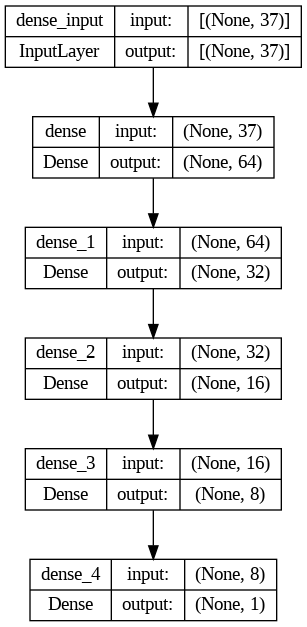

In [122]:
# Plot Layers for Model 
tf.keras.utils.plot_model(model_seq, show_shapes=True)

## 6.2 Sequential - Model Improvement

Several hyperparameters were modified to improve this model : 
1. - Reducing the number of hidden layers from 4 to **2**.
2. - Adding **dropout for every hidden layers**, It has proven to be highly successful even the state-of-the-art neural networks get a 1–2% accuracy boost simply by adding dropout.
3. - Adding Weight Initialization : **HeNormal** for hidden layer 2.
4. - Changing optimizer to **Adam**, Adam is most popular optimizer.

In [123]:
# Sequential - Model Improvement
# Clear Session

seed = 50
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

# Create Sequential API
model_seq2 = tf.keras.models.Sequential()

# Hidden Layer 1
model_seq2.add(tf.keras.layers.Dense(64, activation='relu',input_shape=(X_train_final.shape[1],),kernel_initializer='HeNormal',kernel_regularizer='l1')) 
model_seq2.add(tf.keras.layers.Dropout(rate=0.2)) # adding dropout for every hidden layers

# Hidden Layer 2
model_seq2.add(tf.keras.layers.Dense(32, activation='relu',kernel_initializer='HeNormal')) # adding initializer for every layers
model_seq2.add(tf.keras.layers.Dropout(rate=0.2)) # adding dropout for every hidden layers

# Reducing number of hidden layers
# Output Layer
model_seq2.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model_seq2.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(),metrics=['Recall']) # Optimizer=Adam
model_seq2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                2432      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4,545
Trainable params: 4,545
Non-trainable params: 0
_________________________________________________________________


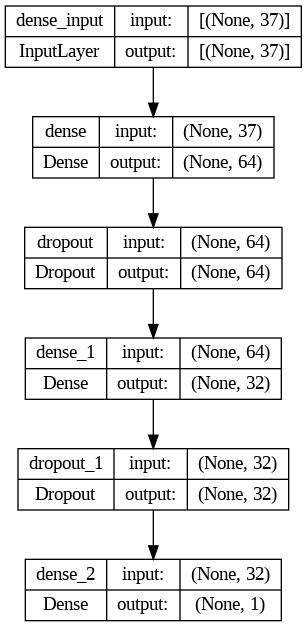

In [124]:
# Plot Layers for Model 
tf.keras.utils.plot_model(model_seq2, show_shapes=True)

## 6.3 Functional

Functional neural network is different from sequential. The model is completely different because it enables sharing or branching layers. The model can be seen by the flow chart, that functional neural network is done paralelly.

The hyperparameters used in this model are the same as those used in the sequential model, with the addition of a **concatenated input layer and hidden layer 3**.



In [125]:
# Functional
# Clear Session

seed = 50
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

# input layer
input_layer = Input(shape=(X_train_final.shape[1],))

# Hidden Layer 1
hidden_layer1 = Dense(64, activation='relu')(input_layer)

# Hidden Layer 2
hidden_layer2 = Dense(32, activation='relu')(hidden_layer1)

# Hidden Layer 3
hidden_layer3 = Dense(16, activation='relu')(hidden_layer2)

# Hidden Layer 4
hidden_layer4 = Dense(8, activation='relu')(hidden_layer3)

# Concat Layer
concat_layer = concatenate([input_layer, hidden_layer4])

# Output Layer
output_layer = Dense(1, activation='sigmoid')(concat_layer)

model_functional = Model(inputs=input_layer, outputs=output_layer)
# Compile
model_functional.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.SGD(),metrics=['Recall'])
model_functional.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 37)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 64)           2432        ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 32)           2080        ['dense[0][0]']                  
                                                                                                  
 dense_2 (Dense)                (None, 16)           528         ['dense_1[0][0]']                
                                                                                              

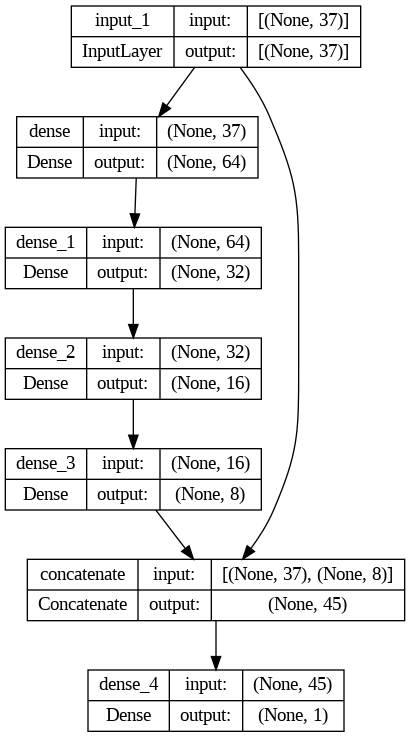

In [126]:
# Plot Layers for Model 
tf.keras.utils.plot_model(model_functional, show_shapes=True)

## 6.4 Functional - Model Improvement

Several hyperparameters were modified to improve this model : 
1. - Reducing the number of hidden layers from 4 to **2**.
2. - Adding **dropout for every hidden layers**
3. - Changing Kernel Regularization to **l2** for hidden layer 1
4. - Adding Weight Initialization : **HeNormal** for hidden layer 2.
5. - Adding **concatenated input layer and Dropout Hidden Layer 2**.
6. - Changing optimizer to **Adam**

In [127]:
# Functional - Model Improvement
# Clear Session

seed = 50
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

# input_layer
input_layer = Input(shape=(X_train_final.shape[1],))
dropout1 = Dropout(0.2)(input_layer)

# hidden_layer1
hidden_layer1 = Dense(64, activation='relu',kernel_initializer='HeNormal',kernel_regularizer='l2')(dropout1)
dropout2 = Dropout(0.2)(hidden_layer1)

# hidden_layer2
hidden_layer2 = Dense(32, activation='relu',kernel_initializer='HeNormal')(dropout2)
dropout3 = Dropout(0.2)(hidden_layer2)

# concat_layer
concat_layer = concatenate([input_layer, dropout3])

# Output Layer
output_layer = Dense(1, activation='sigmoid')(concat_layer)

model_functional2 = Model(inputs=input_layer, outputs=output_layer)

# Compile
model_functional2.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(),metrics=['Recall'])
model_functional2.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 37)]         0           []                               
                                                                                                  
 dropout (Dropout)              (None, 37)           0           ['input_1[0][0]']                
                                                                                                  
 dense (Dense)                  (None, 64)           2432        ['dropout[0][0]']                
                                                                                                  
 dropout_1 (Dropout)            (None, 64)           0           ['dense[0][0]']                  
                                                                                              

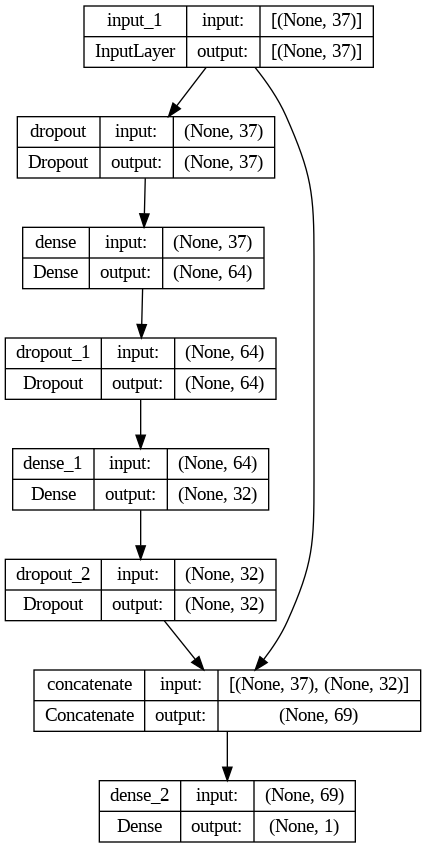

In [128]:
# Plot Layers for Model 
tf.keras.utils.plot_model(model_functional2, show_shapes=True)

---

# 7 - Model Training

> This section explains the process to train the model that we defined in the previous section. 

The number of epochs used for the training model is **250** with callback function `EarlyStopping`(a callback function to stop training when a monitored metric has stopped improving).

In [129]:
# Callback = EarlyStopping

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3,restore_best_weights=True)

## 7.1 Sequential

In [130]:
# Train the Model - Sequential

%%time
history_seq=model_seq.fit(train_pipe, validation_data=(val_pipe), epochs = 250, callbacks=[callback])

Epoch 1/250
54/54 [==============================] - 1s 8ms/step - loss: 5.0741 - recall: 0.9947 - val_loss: 4.9937 - val_recall: 0.9863
Epoch 2/250
54/54 [==============================] - 0s 4ms/step - loss: 4.9277 - recall: 0.9745 - val_loss: 4.8501 - val_recall: 0.9625
Epoch 3/250
54/54 [==============================] - 0s 4ms/step - loss: 4.7835 - recall: 0.9548 - val_loss: 4.7063 - val_recall: 0.9485
Epoch 4/250
54/54 [==============================] - 0s 5ms/step - loss: 4.6378 - recall: 0.9355 - val_loss: 4.5613 - val_recall: 0.9215
Epoch 5/250
54/54 [==============================] - 0s 5ms/step - loss: 4.4910 - recall: 0.9138 - val_loss: 4.4158 - val_recall: 0.8957
Epoch 6/250
54/54 [==============================] - 0s 4ms/step - loss: 4.3439 - recall: 0.8909 - val_loss: 4.2706 - val_recall: 0.8750
Epoch 7/250
54/54 [==============================] - 0s 4ms/step - loss: 4.1953 - recall: 0.8734 - val_loss: 4.1272 - val_recall: 0.8528
Epoch 8/250
54/54 [======================

## 7.2 Sequential - Model Improvement

In [131]:
# Train the Model - Sequential - Model Improvement

%%time
history_seq2=model_seq2.fit(train_pipe, validation_data=(val_pipe), epochs = 250, callbacks=callback)

Epoch 1/250
54/54 [==============================] - 1s 9ms/step - loss: 4.5714 - recall: 0.7737 - val_loss: 3.9088 - val_recall: 0.8188
Epoch 2/250
54/54 [==============================] - 0s 5ms/step - loss: 3.4144 - recall: 0.8238 - val_loss: 2.8766 - val_recall: 0.8028
Epoch 3/250
54/54 [==============================] - 0s 7ms/step - loss: 2.5040 - recall: 0.8304 - val_loss: 2.0846 - val_recall: 0.7927
Epoch 4/250
54/54 [==============================] - 0s 5ms/step - loss: 1.8131 - recall: 0.8341 - val_loss: 1.4977 - val_recall: 0.7970
Epoch 5/250
54/54 [==============================] - 0s 5ms/step - loss: 1.3019 - recall: 0.8425 - val_loss: 1.0744 - val_recall: 0.7997
Epoch 6/250
54/54 [==============================] - 0s 8ms/step - loss: 0.9387 - recall: 0.8412 - val_loss: 0.7743 - val_recall: 0.8020
Epoch 7/250
54/54 [==============================] - 1s 8ms/step - loss: 0.6878 - recall: 0.8435 - val_loss: 0.5746 - val_recall: 0.7942
Epoch 8/250
54/54 [======================

## 7.3 Functional

In [132]:
# Train the Model - Functional

%%time
history_functional=model_functional.fit(train_pipe, validation_data=(val_pipe), epochs = 250, callbacks=callback)

Epoch 1/250
54/54 [==============================] - 2s 15ms/step - loss: 0.7406 - recall: 0.9014 - val_loss: 0.7194 - val_recall: 0.8692
Epoch 2/250
54/54 [==============================] - 1s 8ms/step - loss: 0.6925 - recall: 0.8680 - val_loss: 0.6782 - val_recall: 0.8434
Epoch 3/250
54/54 [==============================] - 1s 9ms/step - loss: 0.6601 - recall: 0.8489 - val_loss: 0.6488 - val_recall: 0.8329
Epoch 4/250
54/54 [==============================] - 1s 8ms/step - loss: 0.6353 - recall: 0.8418 - val_loss: 0.6261 - val_recall: 0.8274
Epoch 5/250
54/54 [==============================] - 1s 7ms/step - loss: 0.6151 - recall: 0.8418 - val_loss: 0.6078 - val_recall: 0.8321
Epoch 6/250
54/54 [==============================] - 1s 7ms/step - loss: 0.5980 - recall: 0.8442 - val_loss: 0.5925 - val_recall: 0.8368
Epoch 7/250
54/54 [==============================] - 1s 6ms/step - loss: 0.5832 - recall: 0.8472 - val_loss: 0.5793 - val_recall: 0.8383
Epoch 8/250
54/54 [=====================

## 7.4 Functional - Model Improvement

In [133]:
# Train the Model - Functional - Model Improvement

%%time
history_functional2=model_functional2.fit(train_pipe, validation_data=(val_pipe), epochs = 250, callbacks=callback)

Epoch 1/250
54/54 [==============================] - 1s 10ms/step - loss: 1.7883 - recall: 0.7082 - val_loss: 1.4641 - val_recall: 0.8817
Epoch 2/250
54/54 [==============================] - 0s 6ms/step - loss: 1.2948 - recall: 0.8166 - val_loss: 1.0320 - val_recall: 0.9043
Epoch 3/250
54/54 [==============================] - 0s 7ms/step - loss: 0.9720 - recall: 0.8297 - val_loss: 0.7757 - val_recall: 0.9239
Epoch 4/250
54/54 [==============================] - 0s 6ms/step - loss: 0.7705 - recall: 0.8427 - val_loss: 0.6208 - val_recall: 0.9293
Epoch 5/250
54/54 [==============================] - 0s 6ms/step - loss: 0.6349 - recall: 0.8546 - val_loss: 0.5119 - val_recall: 0.9141
Epoch 6/250
54/54 [==============================] - 0s 6ms/step - loss: 0.5414 - recall: 0.8589 - val_loss: 0.4397 - val_recall: 0.9426
Epoch 7/250
54/54 [==============================] - 0s 6ms/step - loss: 0.4704 - recall: 0.8710 - val_loss: 0.3833 - val_recall: 0.9414
Epoch 8/250
54/54 [=====================

---

# 8 - Model Evaluation

> In this section, a model evaluation is carried out. The evaluation of the model trained in the previous section is shown with the Classification Report and Confusion Matrix.

## 8.1 Sequential

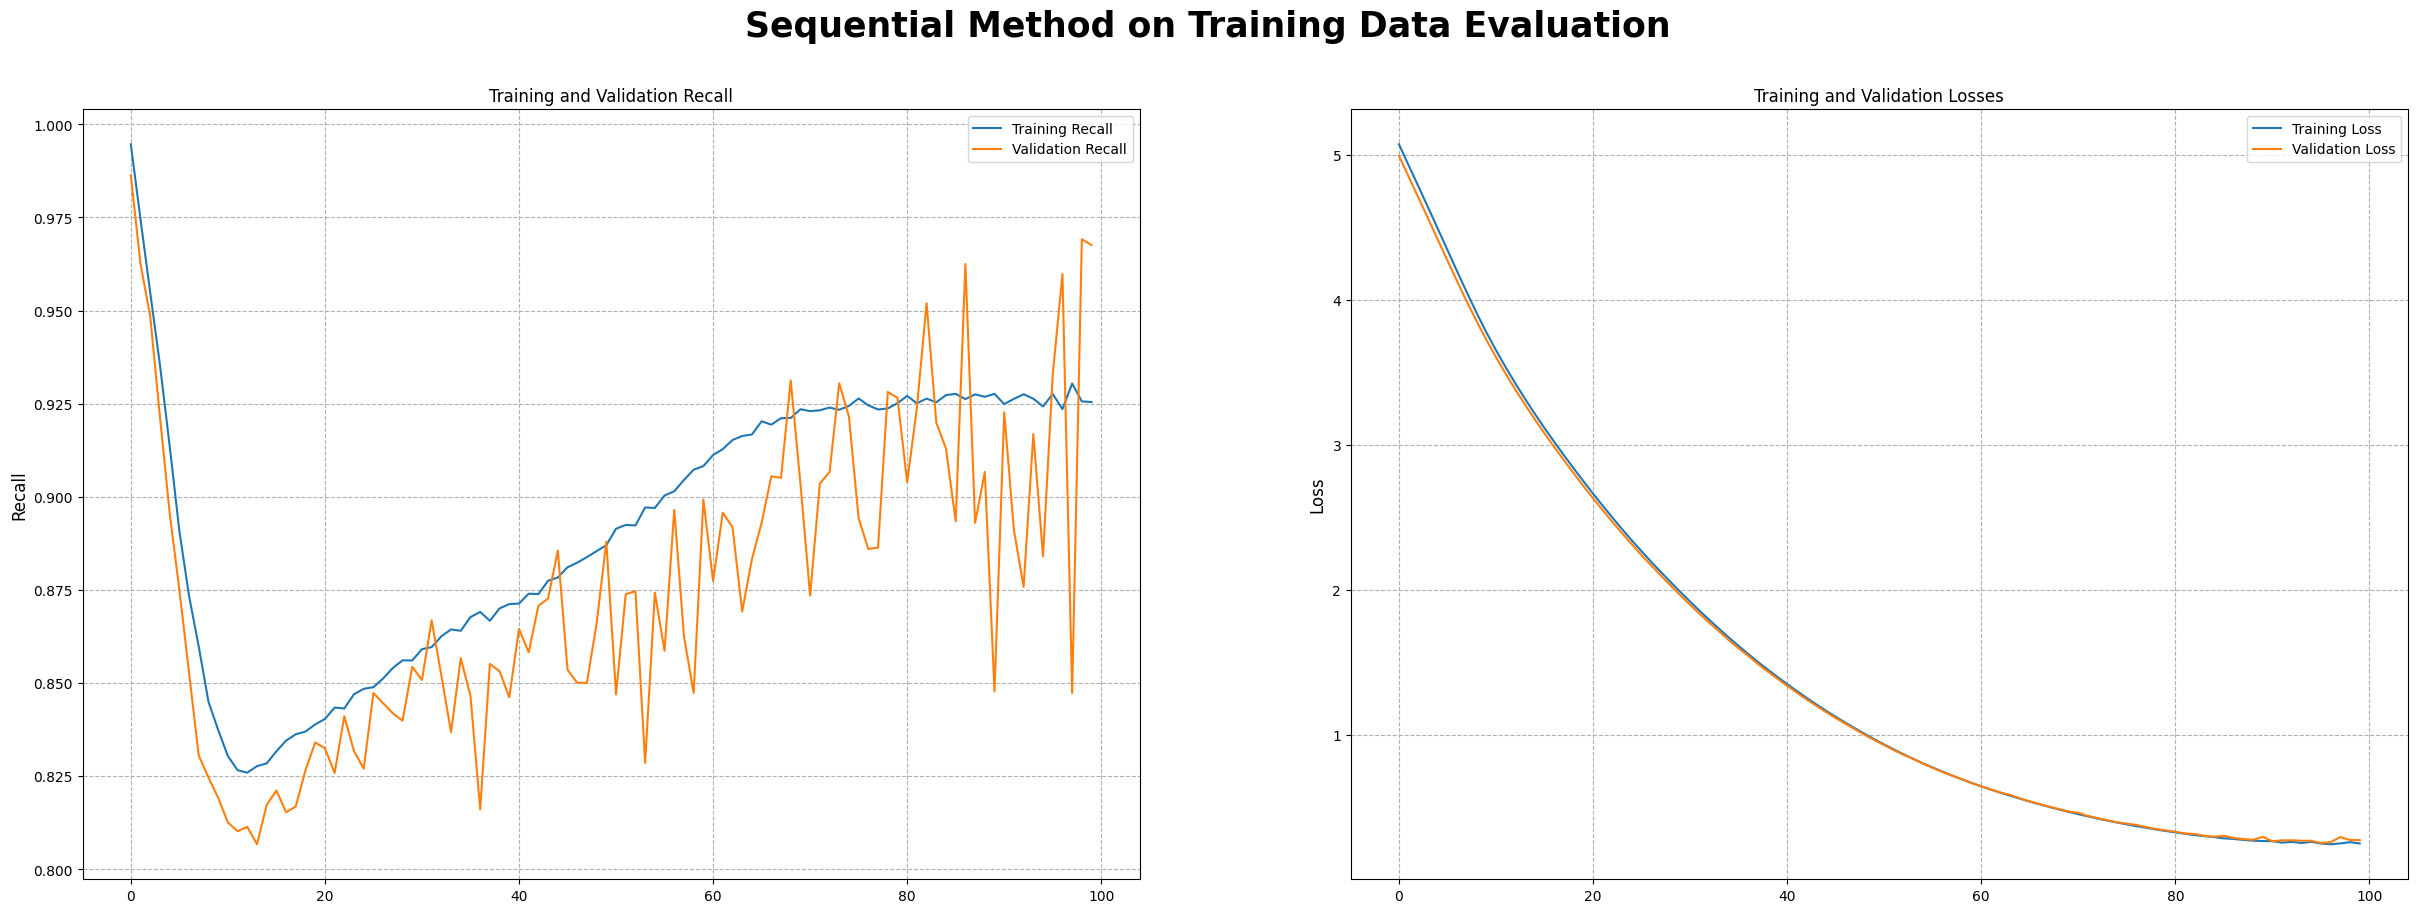

In [134]:
fig, ax = plt.subplots(1,2, figsize=(30,10))
fig.suptitle('Sequential Method on Training Data Evaluation', fontsize=25, weight='bold')

plt.subplot(1,2,1)
plt.title("Training and Validation Recall", fontsize=12)
plt.plot(history_seq.history['recall'],label="Training Recall")
plt.plot(history_seq.history['val_recall'], label="Validation Recall")
plt.ylabel("Recall", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title("Training and Validation Losses", fontsize=12)
plt.plot(history_seq.history['loss'], label="Training Loss")
plt.plot(history_seq.history['val_loss'], label="Validation Loss")
plt.ylabel("Loss", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.style.use('default')
plt.show()

Based on the train and validation `recall` and `loss`, we can see that this model is **good-fit**. There is no exploding and vanishing gradients, which means the hyperparameters we defined work to the model.

174/174 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

         0.0       0.95      0.87      0.91      2603
         1.0       0.90      0.96      0.93      2947

    accuracy                           0.92      5550
   macro avg       0.92      0.92      0.92      5550
weighted avg       0.92      0.92      0.92      5550



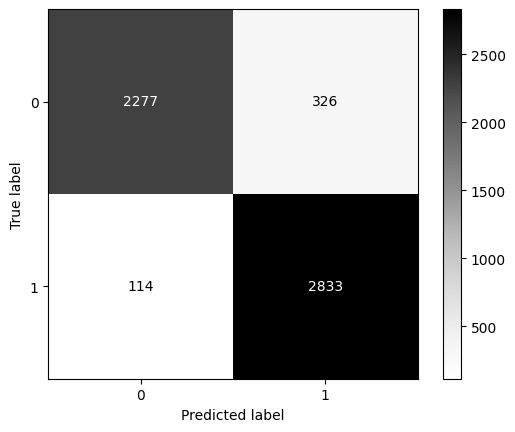

In [135]:
# Model Evaluation of test-set

y_pred_seq = model_seq.predict(X_test_final)
y_pred_seq = np.where(y_pred_seq >= 0.5, 1, 0)

print(classification_report(y_test_final, y_pred_seq))

# confusion matrix

cm = confusion_matrix(y_test_final, y_pred_seq)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,)
disp.plot(cmap='Greys')
plt.show()

Based on the classification report and confusion matrix above, this model is accurate enough to predict **whether a customer is at risk of churning** and there are not too many misclassifications. Next, this model will undergo model improvement, and then the results of the model improvement will be compared to the results without model improvement.

## 8.2 Sequential - Model Improvement

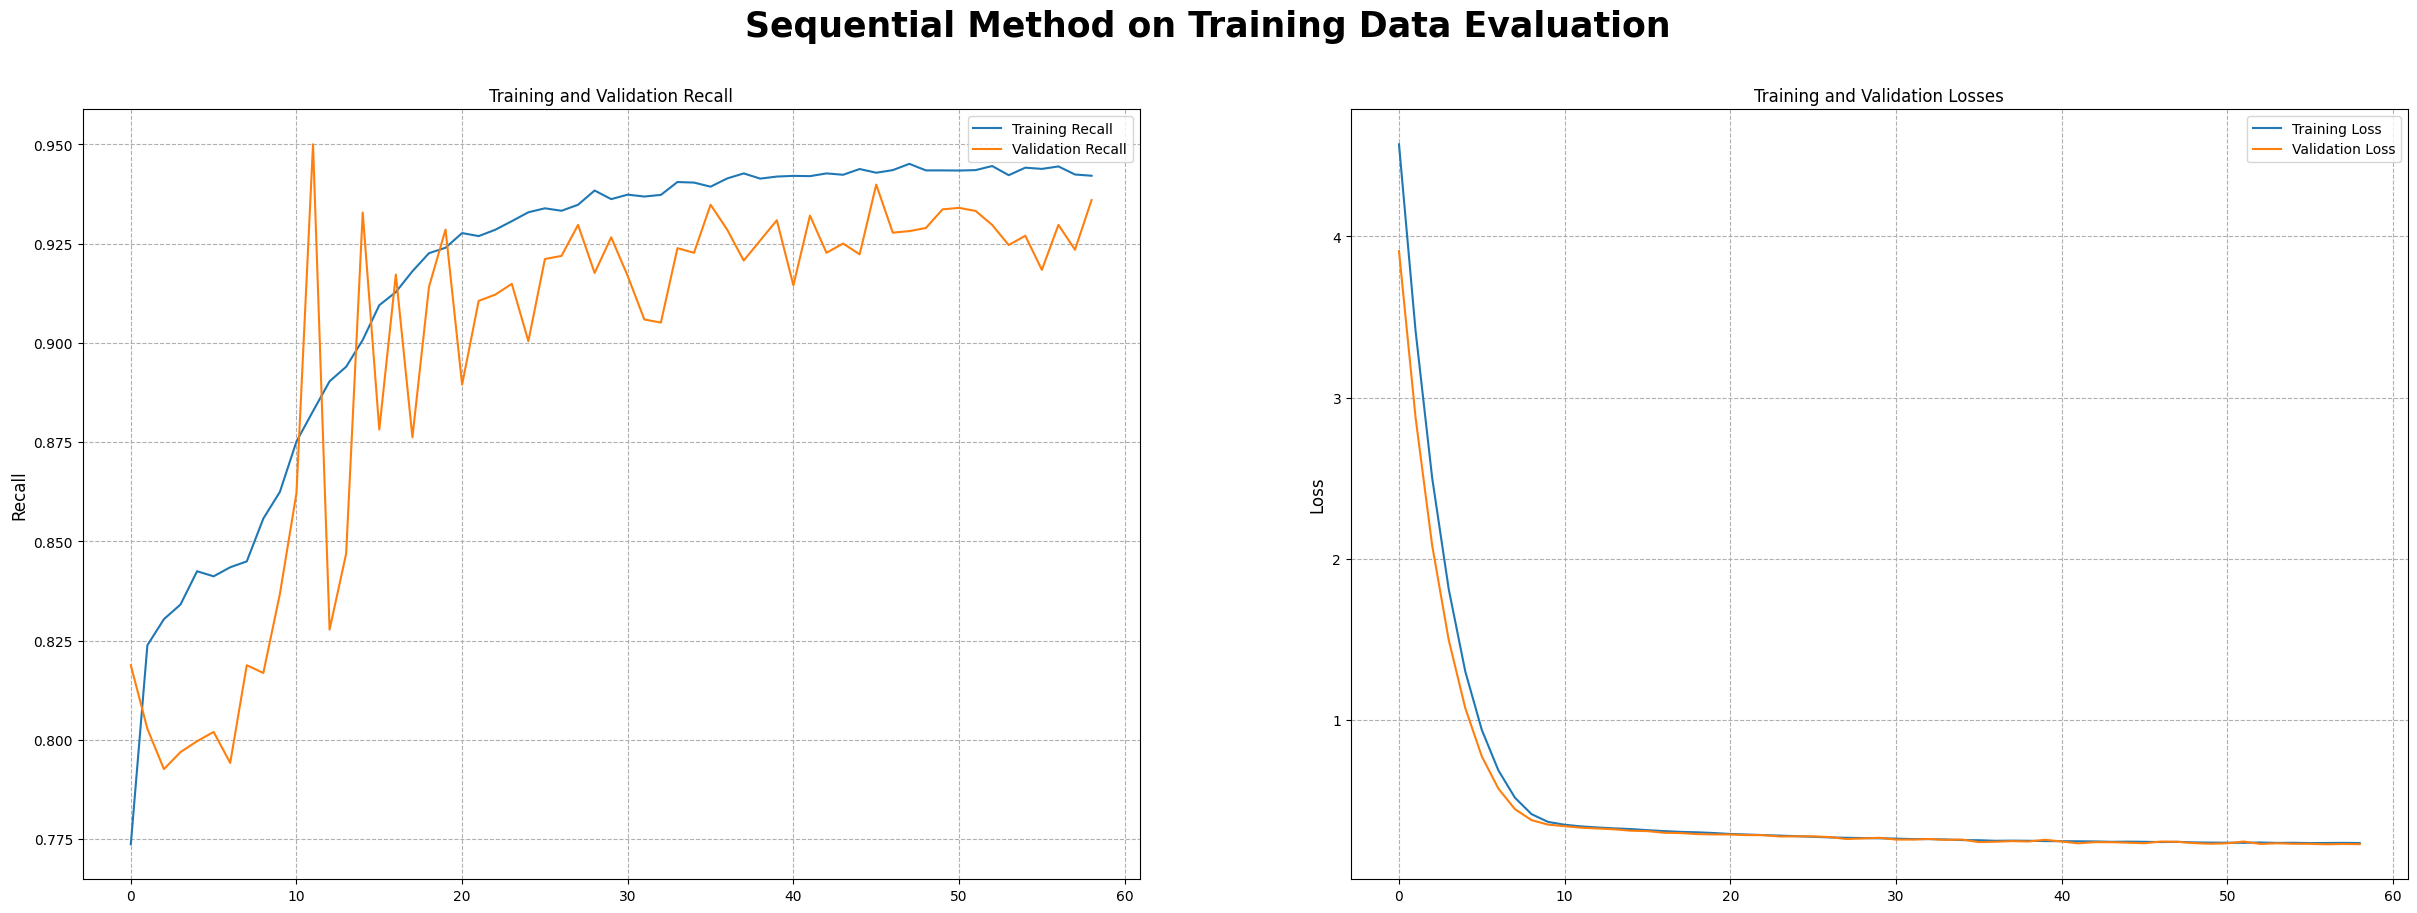

In [136]:
fig, ax = plt.subplots(1,2, figsize=(30,10))
fig.suptitle('Sequential Method on Training Data Evaluation', fontsize=25, weight='bold')

plt.subplot(1,2,1)
plt.title("Training and Validation Recall", fontsize=12)
plt.plot(history_seq2.history['recall'],label="Training Recall")
plt.plot(history_seq2.history['val_recall'], label="Validation Recall")
plt.ylabel("Recall", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title("Training and Validation Losses", fontsize=12)
plt.plot(history_seq2.history['loss'], label="Training Loss")
plt.plot(history_seq2.history['val_loss'], label="Validation Loss")
plt.ylabel("Loss", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.style.use('default')
plt.show()

Based on the visualization above, this model converges faster than without the improvement. This model only need **59 epochs** to train this model. This shows that the hyperparameter that we modified is working properly.

174/174 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

         0.0       0.91      0.94      0.93      2603
         1.0       0.94      0.92      0.93      2947

    accuracy                           0.93      5550
   macro avg       0.93      0.93      0.93      5550
weighted avg       0.93      0.93      0.93      5550



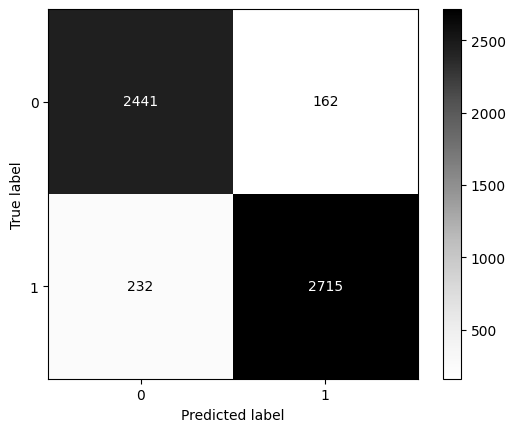

In [137]:
# Model Evaluation of test-set

y_pred_seq2 = model_seq2.predict(X_test_final)
y_pred_seq2 = np.where(y_pred_seq2 >= 0.5, 1, 0)

print(classification_report(y_test_final, y_pred_seq2))

# confusion matrix
cm = confusion_matrix(y_test_final, y_pred_seq2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,)
disp.plot(cmap='Greys')
plt.show()

Based on the classification report and confusion matrix above, this model is more `accurate` in predicting customers who are at risk of churning than before the improvement model. 

This model also has better `precision` and `recall` values than before the model improvement. This shows that this model has low number of false negative (**customer is not at risk of churning predicted as customers is at risk of churning**) and false positive (**customer is at risk of churning predicted as customers is not at risk of churning**).


## 8.3 Functional

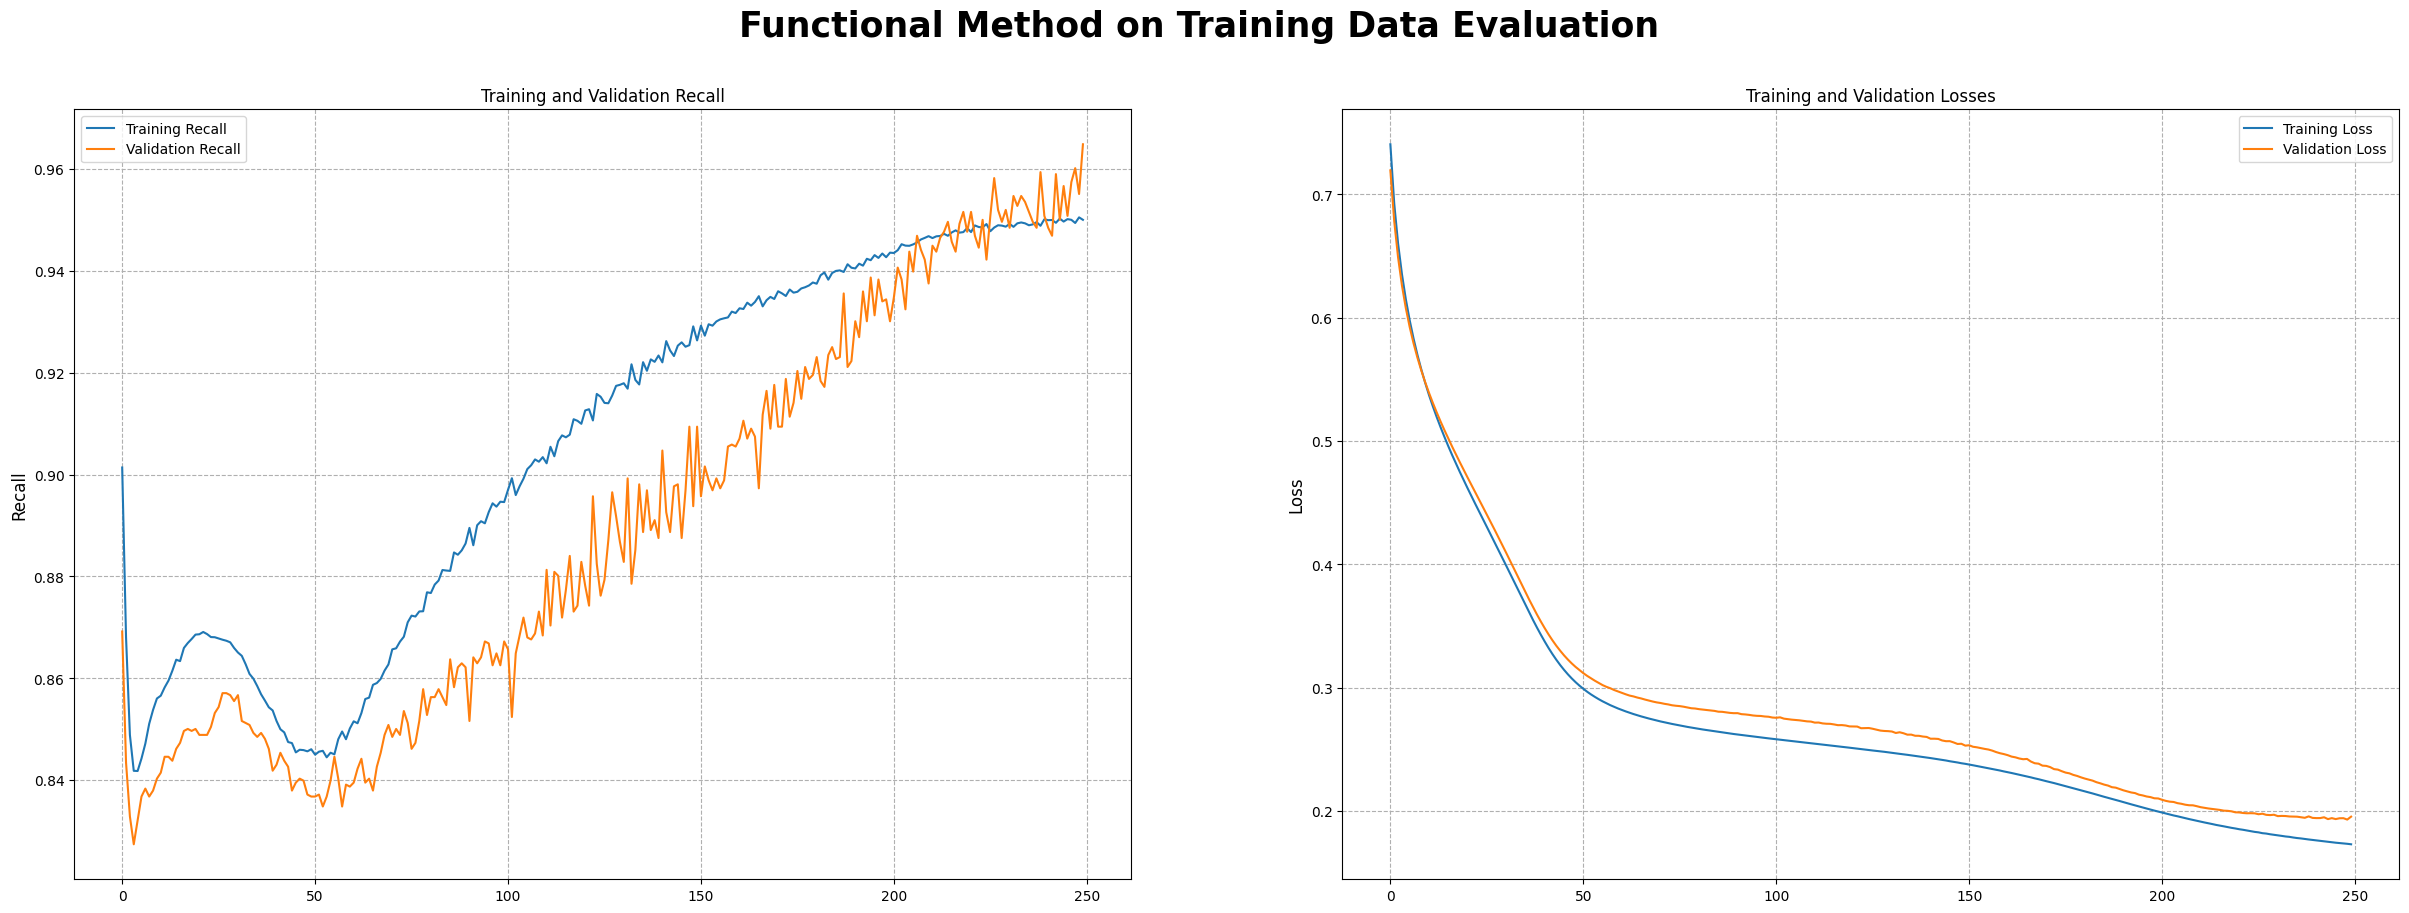

In [138]:
fig, ax = plt.subplots(1,2, figsize=(30,10))
fig.suptitle('Functional Method on Training Data Evaluation', fontsize=25, weight='bold')

plt.subplot(1,2,1)
plt.title("Training and Validation Recall", fontsize=12)
plt.plot(history_functional.history['recall'],label="Training Recall")
plt.plot(history_functional.history['val_recall'], label="Validation Recall")
plt.ylabel("Recall", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title("Training and Validation Losses", fontsize=12)
plt.plot(history_functional.history['loss'], label="Training Loss")
plt.plot(history_functional.history['val_loss'], label="Validation Loss")
plt.ylabel("Loss", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.style.use('default')
plt.show()

Based on the train and validation `recall` and `loss`, we can see that this model is **good-fit**. There is no exploding and vanishing gradients, which means the hyperparameters we defined work to the model.

174/174 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

         0.0       0.96      0.87      0.91      2603
         1.0       0.90      0.96      0.93      2947

    accuracy                           0.92      5550
   macro avg       0.93      0.92      0.92      5550
weighted avg       0.92      0.92      0.92      5550



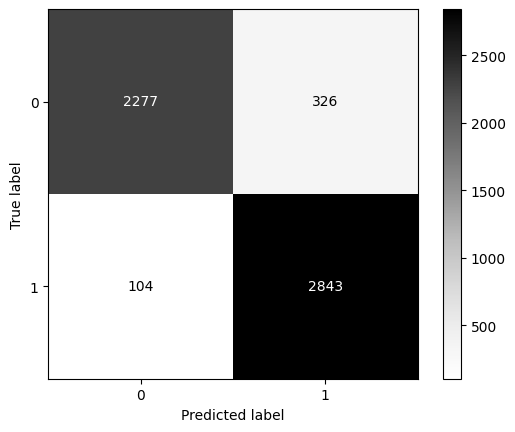

In [139]:
# Model Evaluation of test-set

y_pred_functional = model_functional.predict(X_test_final)
y_pred_functional = np.where(y_pred_functional >= 0.5, 1, 0)

print(classification_report(y_test_final, y_pred_functional))

# confusion matrix
cm = confusion_matrix(y_test_final, y_pred_functional)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,)
disp.plot(cmap='Greys')
plt.show()

Based on the classification report and confusion matrix above, same as sequential model this model is accurate enough to predict **whether a customer is at risk of churning and there are not too many misclassifications**. Next, this model will undergo model improvement, and then the results of the model improvement will be compared to the results without model improvement.

## 8.4 Functional - Model Improvement

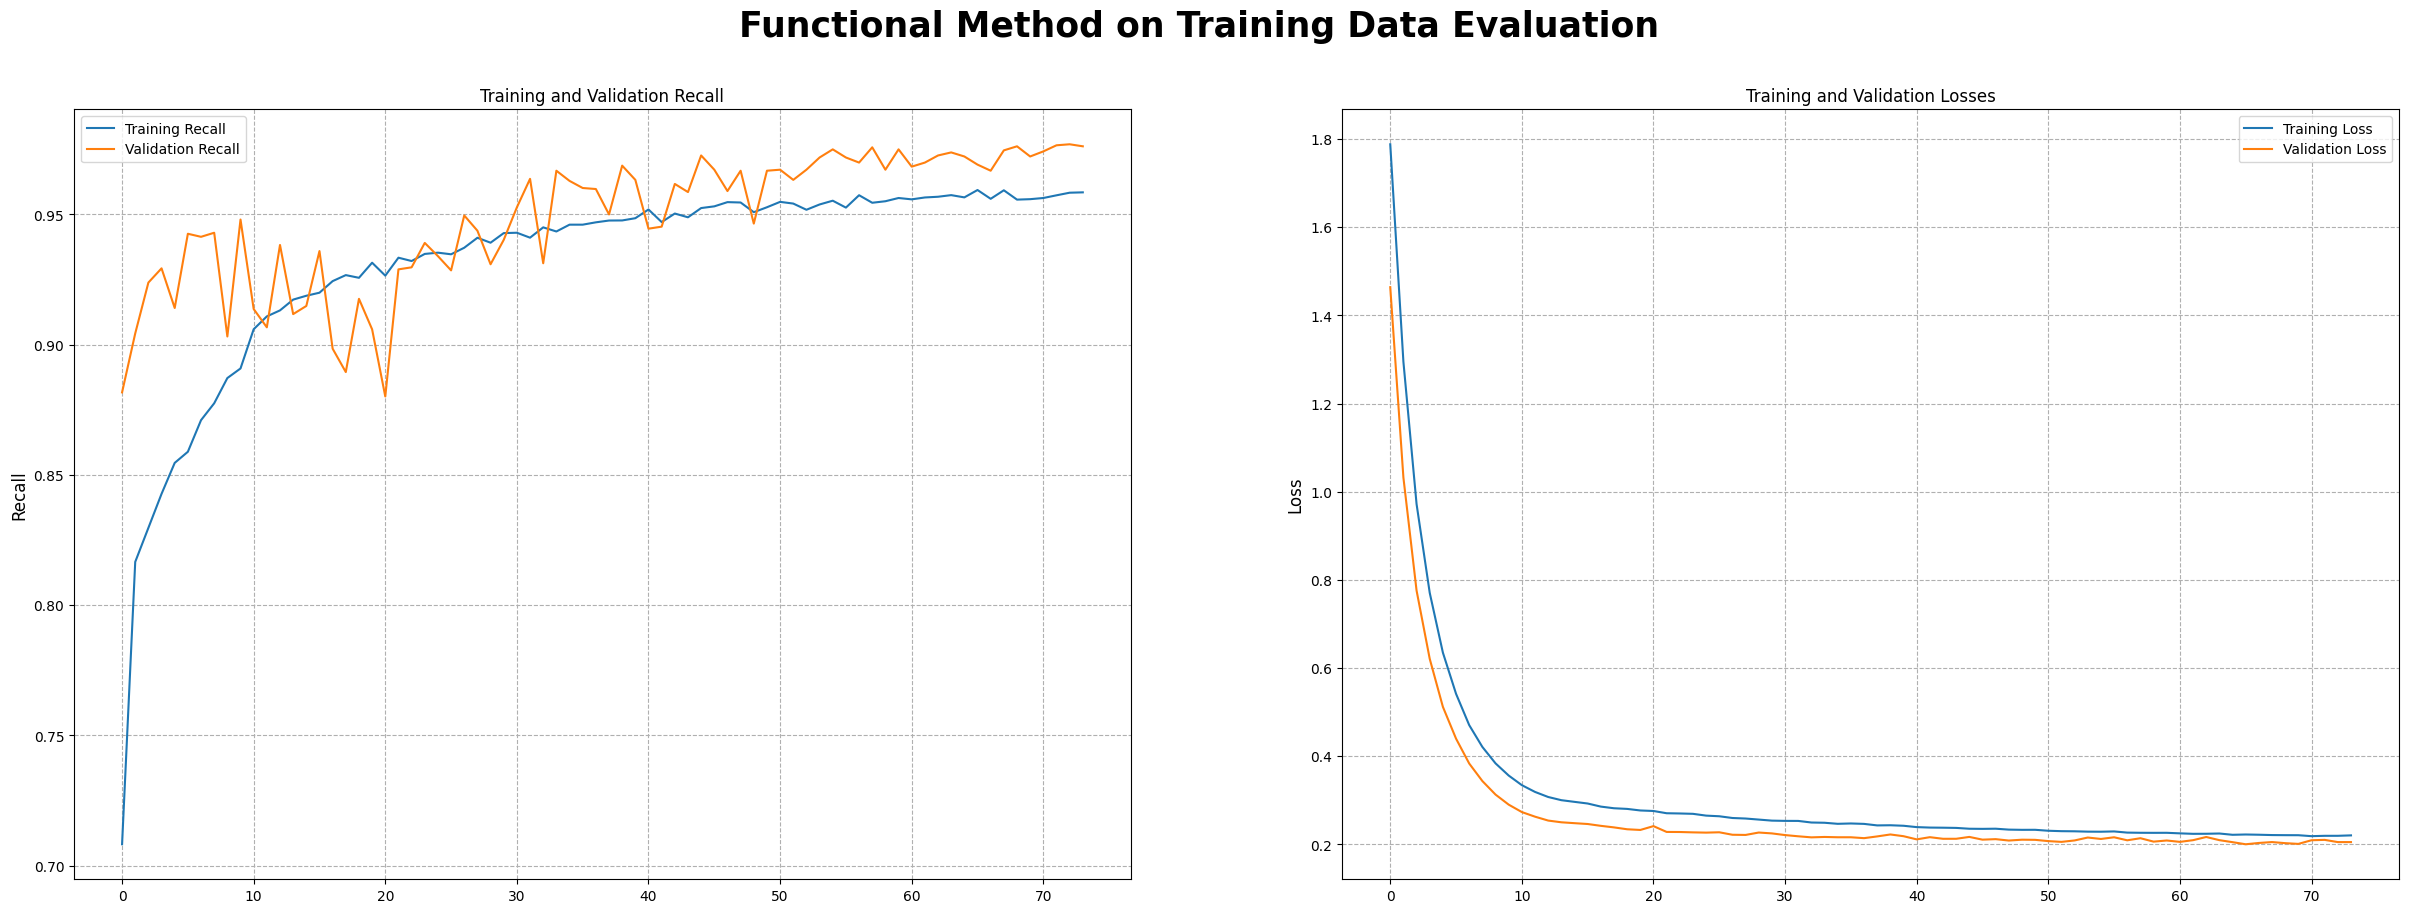

In [140]:
fig, ax = plt.subplots(1,2, figsize=(30,10))
fig.suptitle('Functional Method on Training Data Evaluation', fontsize=25, weight='bold')

plt.subplot(1,2,1)
plt.title("Training and Validation Recall", fontsize=12)
plt.plot(history_functional2.history['recall'],label="Training Recall")
plt.plot(history_functional2.history['val_recall'], label="Validation Recall")
plt.ylabel("Recall", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title("Training and Validation Losses", fontsize=12)
plt.plot(history_functional2.history['loss'], label="Training Loss")
plt.plot(history_functional2.history['val_loss'], label="Validation Loss")
plt.ylabel("Loss", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.style.use('default')
plt.show()

Based on the visualization above, this model converges faster than without the improvement. This model only need **74 epochs** to train this model. This shows that the hyperparameter that we modified is working properly.

174/174 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

         0.0       0.97      0.85      0.91      2603
         1.0       0.88      0.98      0.93      2947

    accuracy                           0.92      5550
   macro avg       0.93      0.91      0.92      5550
weighted avg       0.92      0.92      0.92      5550



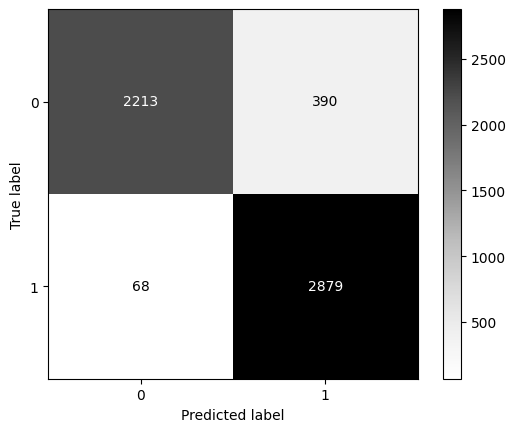

In [141]:
# Model Evaluation of test-set

y_pred_functional2 = model_functional2.predict(X_test_final)
y_pred_functional2 = np.where(y_pred_functional2 >= 0.5, 1, 0)

print(classification_report(y_test_final, y_pred_functional2))

# confusion matrix

cm = confusion_matrix(y_test_final, y_pred_functional2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,)
disp.plot(cmap='Greys')
plt.show()

Based on the classification report and confusion matrix above, this model has the highest `recall` for label 1 (**customers who are not at risk of churn**) compared to other models. This model is better if we want to find the number of customers who are not at risk to churn. 


## 8.5 Summary of Model Evaluation

Because we aim to identify the number of customers who are at risk of churning in this project, we have chosen the **improved sequential model** as our primary model. This model exhibits the highest `recall` for label 0 (**customers who are at risk of churning**) and the lowest false negative rate (**customers not at risk of churning predicted as customers at risk of churning**).

---

# 9 - Model Saving and Model Inference

> This section explains the process of saving and loading models and other files related to the results of the models that we created in the previous chapter. Since there are only 10 data, handling outliers could be skipped. From here, we can compare and observe if the actual data of `churn_risk_score` is correct with the predicted classification.

## 9.1 Model Saving

In [142]:
# Save Pipeline
with open('final_pipeline.pkl', 'wb') as file_1:
  pickle.dump(final_pipeline, file_1)
with open('Drop_Columns.txt', 'w') as file_2:
  json.dump(Drop_Columns, file_2)

In [143]:
# Summary of Model Sequential

model_seq2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                2432      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4,545
Trainable params: 4,545
Non-trainable params: 0
_________________________________________________________________


In [144]:
# Freeze Model

model_seq2.trainable = False
model_seq2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                2432      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4,545
Trainable params: 0
Non-trainable params: 4,545
_________________________________________________________________


In [145]:
# Save ANN Model

model_seq2.save('model_seq2.h5')

## 9.2 Model Inference

### Model Loading

In [146]:
# Load the Models
with open('final_pipeline.pkl', 'rb') as file_1:
  final_pipeline = pickle.load(file_1)
  
with open('Drop_Columns.txt','r') as file_2:
  Drop_Columns = json.load(file_2)

model_seq2 = load_model('model_seq2.h5')


In [147]:
# data loading
df_inf = pd.read_csv('h8dsft_p2m1_Ahmad Luay Adnani_inference.csv')
df_inf_copy = df_inf.copy()
df_inf_copy = df_inf.drop(['Unnamed: 0'],axis=1)
df_inf_copy

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,972706cb0db0068e,46,F,Town,Premium Membership,2015-03-27,No,Credit/Debit Card Offers,Smartphone,Mobile_Data,...,1447.387929,11839.58,29.0,727.91,Yes,No,No,Not Applicable,No reason specified,0
1,82d62cc806fb2816,25,M,Town,Premium Membership,2016-09-07,NaN,Without Offers,Smartphone,Wi-Fi,...,114.170000,46885.80,8.0,793.11,No,Yes,Yes,Unsolved,No reason specified,0
2,a596b4679c30ef3e,64,M,NaN,Basic Membership,2017-09-07,Yes,Credit/Debit Card Offers,Smartphone,Wi-Fi,...,204.430000,42224.69,26.0,510.37,Yes,No,Yes,Solved,Too many ads,1
3,8c4761dbf8df1816,52,F,City,Gold Membership,2017-12-31,Yes,NaN,Smartphone,Wi-Fi,...,179.330000,48836.04,20.0,705.00,Yes,No,Yes,Solved in Follow-up,No reason specified,0
4,8f2f492e0c25eb41,60,M,Town,Basic Membership,2015-07-08,Yes,Credit/Debit Card Offers,Smartphone,Wi-Fi,...,38.940000,14104.52,21.0,677.41,Yes,No,Yes,No Information Available,Poor Customer Service,0
5,9bba07c5c386c34c,57,F,City,Silver Membership,2016-06-22,No,Gift Vouchers/Coupons,NaN,Mobile_Data,...,0.000000,8150.90,20.0,793.32,No,Yes,No,Not Applicable,No reason specified,0
6,8a205a969e23299d,17,M,NaN,Gold Membership,2015-05-19,No,Gift Vouchers/Coupons,Desktop,Wi-Fi,...,199.940000,75765.63,0.0,820.17,Yes,No,Yes,Solved,Quality Customer Care,0
7,91607fb18aafbfee,15,M,City,No Membership,2017-11-15,Yes,Gift Vouchers/Coupons,Desktop,Fiber_Optic,...,67.550000,32777.77,23.0,533.44,Yes,No,No,Not Applicable,Poor Customer Service,1
8,847bddd58ff99d7e,32,M,Town,Basic Membership,2016-02-02,Yes,Without Offers,Smartphone,Mobile_Data,...,119.980000,1888.81,28.0,628.93,No,Yes,No,Not Applicable,Too many ads,1
9,8c92ce118df969a1,29,M,Village,Platinum Membership,2016-10-19,No,Credit/Debit Card Offers,NaN,Fiber_Optic,...,145.070000,28873.91,19.0,715.50,No,Yes,No,Not Applicable,Too many ads,0


In [148]:
# Removing unnecessary features
df_inf_final = df_inf_copy.drop(Drop_Columns,axis=1).sort_index()
df_inf_final

,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,offer_application_preference,past_complaint,feedback,churn_risk_score
0,Town,Premium Membership,No,Credit/Debit Card Offers,Smartphone,1447.387929,11839.58,29.0,727.91,No,No,No reason specified,0
1,Town,Premium Membership,NaN,Without Offers,Smartphone,114.170000,46885.80,8.0,793.11,Yes,Yes,No reason specified,0
2,NaN,Basic Membership,Yes,Credit/Debit Card Offers,Smartphone,204.430000,42224.69,26.0,510.37,No,Yes,Too many ads,1
3,City,Gold Membership,Yes,NaN,Smartphone,179.330000,48836.04,20.0,705.00,No,Yes,No reason specified,0
4,Town,Basic Membership,Yes,Credit/Debit Card Offers,Smartphone,38.940000,14104.52,21.0,677.41,No,Yes,Poor Customer Service,0
5,City,Silver Membership,No,Gift Vouchers/Coupons,NaN,0.000000,8150.90,20.0,793.32,Yes,No,No reason specified,0
6,NaN,Gold Membership,No,Gift Vouchers/Coupons,Desktop,199.940000,75765.63,0.0,820.17,No,Yes,Quality Customer Care,0
7,City,No Membership,Yes,Gift Vouchers/Coupons,Desktop,67.550000,32777.77,23.0,533.44,No,No,Poor Customer Service,1
8,Town,Basic Membership,Yes,Without Offers,Smartphone,119.980000,1888.81,28.0,628.93,Yes,No,Too many ads,1
9,Village,Platinum Membership,No,Credit/Debit Card Offers,NaN,145.070000,28873.91,19.0,715.50,Yes,No,Too many ads,0


### Handling Missing Values

In [149]:
# Check Missing Values in Data Inference

df_inf_final.isnull().sum()

region_category                 2
membership_category             0
joined_through_referral         1
preferred_offer_types           1
medium_of_operation             2
avg_time_spent                  0
avg_transaction_value           0
avg_frequency_login_days        0
points_in_wallet                0
offer_application_preference    0
past_complaint                  0
feedback                        0
churn_risk_score                0
dtype: int64

In [150]:
# Fill missing values in categorical data with 'Unknown'
df_inf_final = df_inf_final.fillna({'region_category':'Unknown','joined_through_referral':'Unknown','medium_of_operation':'Unknown','preferred_offer_types':'Unknown'})

In [151]:
# Transform Inference-Set

data_inf_transform = final_pipeline.transform(df_inf_final)
data_inf_transform

array([[-0.92260035,  0.42325585,  0.65168539,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  1.        ,
         0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.95864668,  0.7737009 ,  0.17977528,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  1.        ,  1.        ,  0.        ,
         0.     

In [152]:
# Predict using Neural Network

y_pred_inf = model_seq2.predict(data_inf_transform)
y_pred_inf = np.where(y_pred_inf >= 0.5, 1, 0)
y_pred_inf

1/1 [==============================] - 0s 65ms/step


array([[0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0]])

In [153]:
# Create Prediction DataFrame

y_pred_inf_df = pd.DataFrame(y_pred_inf, columns=['churn_risk_score_prediction'],index=df_inf_final.index)
y_pred_inf_df

,churn_risk_score_prediction
0,0
1,0
2,1
3,0
4,1
5,0
6,0
7,1
8,1
9,0


In [154]:
# Comparing the real Classes with predicted classification
model_inf = pd.concat([df_inf_copy['churn_risk_score'], y_pred_inf_df['churn_risk_score_prediction']], axis=1).sort_index()
model_inf

,churn_risk_score,churn_risk_score_prediction
0,0,0
1,0,0
2,1,1
3,0,0
4,0,1
5,0,0
6,0,0
7,1,1
8,1,1
9,0,0


Based on the prediction of data inference, apparently there is prediction with different results of the actual `churn_risk_score`, which is customer #4. This data inference prediction reflects the model's `precision`, `recall`, and` accuracy` which is around **92-94%**.

---

# 10 - Conclusion and Recommendation

> This section contains the conclusions of the analysis that has been carried out.

1. Based on Exploratory Data Analysis:
  -  Percentage of customer at risk of churning is 54.1%
  - Customers without membership and customers with basic membership have the highest risk of churning due to lack of loyalty, limited benefits, price sensitivity, and limited engagement.
  - Customers who are at risk of churning have a lower average transaction value compared to customers who are not at risk of churning due to reduced usage, price sensitivity, and disengagement.
  - Customers who are at risk of churning may have a lower points balance in their wallet
  - Poor product quality can cause customers to be at risk of churning due to reduced satisfaction, negative word-of-mouth, lack of trust and perceived value.
  - Features that have have a strong correlation with the target variable (`churn_risk_score`) are `membership_category`, `points_in_wallet`,`avg_transaction_value`,`feedback`,`avg_frequency_login_days`,`joined_through_referral`,`preferred_offer_types`,`medium_of_operation`,`region_category` and `offer_application_preference`.

2. Based on Model Evaluation:
  -  The selected model is the sequential model that has been improved with model improvement. This model also has the highest recall for label 0 (customers who are at risk of churning) and has the lowest false negative (customer is not at risk of churning predicted as customers is at risk of churning).

3. Business Insights: 
  - To retain e-commerce customers who are at risk of churning, it is important to address the factors that contribute to their likelihood of churning. Some effective strategies may include offering loyalty rewards programs, providing personalized offers and promotions, improving the overall customer experience, and investing in customer engagement through targeted email campaigns and social media outreach.


4. Further Improvement: 
  - Try another hyperparameter for the model